In [1]:
#Importing passcode for data
import os
import Acquire as a
import Prepare as p

#Importing libraries
import os
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import json
import warnings
import seaborn as sns
import requests
import yfinance as yf
import functions as f

#Statsmodels
from statsmodels.tsa.stattools import adfuller
import scipy.stats as stats

# modeling
import statsmodels.api as sm
from statsmodels.tsa.api import Holt, ExponentialSmoothing
np.random.seed(0)

# evaluate
from sklearn.metrics import mean_squared_error
from math import sqrt 
warnings.filterwarnings("ignore")

# plotting
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


# Goals 

* Explore and analyze Apple's stock for pricing trends and patterns.
* Create a machine learning model that predicts the future stock price of Apple stocks
* Gather findings, draw conclusions and recommended next steps for forecasting.

# Acquire

* Acquired json data from url, https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=AAPL&&outputsize=full&apikey={apipasscode}
* DataFrame contains 5861 rows and 8 columns.
* DataFrame contains no null values.

In [2]:
df = a.get_apple_data()

### DataFrame information

In [3]:
a.get_apple_data_info()

,1. Information,2. Symbol,3. Last Refreshed,4. Output Size,5. Time Zone
0,Daily Time Series with Splits and Dividend Events,AAPL,2023-02-15,Full size,US/Eastern


### DataFrame Sample

In [4]:
df.head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2023-02-15,153.11,155.5,152.88,155.33,155.33,65669252,0.0000,1.0
2023-02-14,152.12,153.77,150.86,153.2,153.2,61707573,0.0000,1.0
2023-02-13,150.952,154.26,150.92,153.85,153.85,62199013,0.0000,1.0
2023-02-10,149.46,151.3401,149.22,151.01,151.01,57450708,0.2300,1.0
2023-02-09,153.775,154.33,150.42,150.87,150.64056268183,56007143,0.0000,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5861 entries, 2023-02-15 to 1999-11-01
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   1. open               5861 non-null   object
 1   2. high               5861 non-null   object
 2   3. low                5861 non-null   object
 3   4. close              5861 non-null   object
 4   5. adjusted close     5861 non-null   object
 5   6. volume             5861 non-null   object
 6   7. dividend amount    5861 non-null   object
 7   8. split coefficient  5861 non-null   object
dtypes: object(8)
memory usage: 412.1+ KB


In [6]:
df.shape

(5861, 8)

# Preparation

* Removed columns dividend amount and split coefficient
* Renamed columns to promote readability
* Cleaned DataFrame datatypes from objects to numerical values
* Removed white space from values in object columns
    * Used target variable: Close

In [7]:
df=p.clean_aapl(df)

In [8]:
df.head()

,Open,High,Low,Close,Adjusted_Close,Volume,month,day_of_week
2023-02-15,153.110,155.5000,152.88,155.33,155.330000,65669252.0,Feb,Wednesday
2023-02-14,152.120,153.7700,150.86,153.20,153.200000,61707573.0,Feb,Tuesday
2023-02-13,150.952,154.2600,150.92,153.85,153.850000,62199013.0,Feb,Monday
2023-02-10,149.460,151.3401,149.22,151.01,151.010000,57450708.0,Feb,Friday
2023-02-09,153.775,154.3300,150.42,150.87,150.640563,56007143.0,Feb,Thursday


# DataFrame Dictionary

| Feature | Dictionary |
|:--------|:-----------|
|Open| is the first price at which a security traded during the regular trading day.
|High| Min value for the period
|Low| Min value for the period
|Close|	is the last price at which a security traded during the regular trading day.
|Adjusted_Close| is the closing price after adjustments for all applicable splits and dividend distributions.
|Volume| Volume is the amount of an asset or security that changes hands over some period of  time, often over the course of a day. 
|month| Month the stock transaction was placed.
|day_of_week| Day of the week the transaction was placed.


# DataFrame Summary

In [9]:
df.describe().T # DataFrame of AAPL summary

,count,mean,std,min,25%,50%,75%,max
Open,5861.0,1.732547e+02,1.521736e+02,12.99000,6.965000e+01,1.300000e+02,2.034600e+02,7.024100e+02
High,5861.0,1.751992e+02,1.534298e+02,13.19000,7.089000e+01,1.316300e+02,2.051700e+02,7.050700e+02
Low,5861.0,1.711936e+02,1.507114e+02,12.72000,6.820000e+01,1.283100e+02,2.016900e+02,6.995700e+02
Close,5861.0,1.732537e+02,1.521073e+02,13.12000,6.959000e+01,1.300600e+02,2.034300e+02,7.021000e+02
Adjusted_Close,5861.0,2.908084e+01,4.349267e+01,0.19913,1.413637e+00,1.078213e+01,3.366717e+01,1.804563e+02
Volume,5861.0,3.131019e+07,3.011107e+07,702500.00000,1.103860e+07,2.278550e+07,3.943880e+07,3.326072e+08


# Visual of Total Count

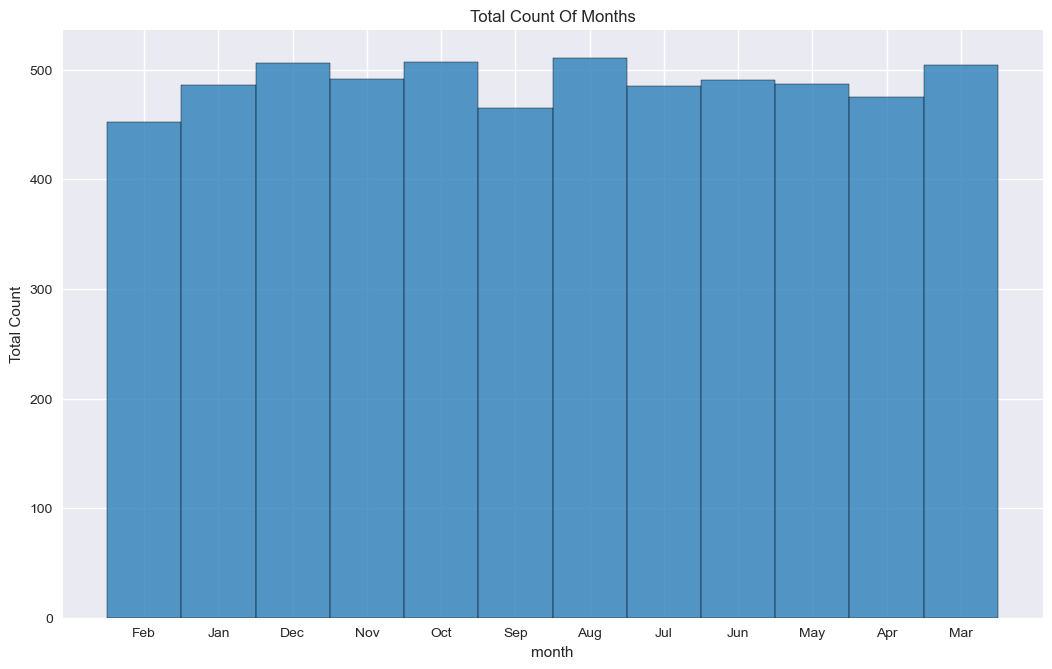

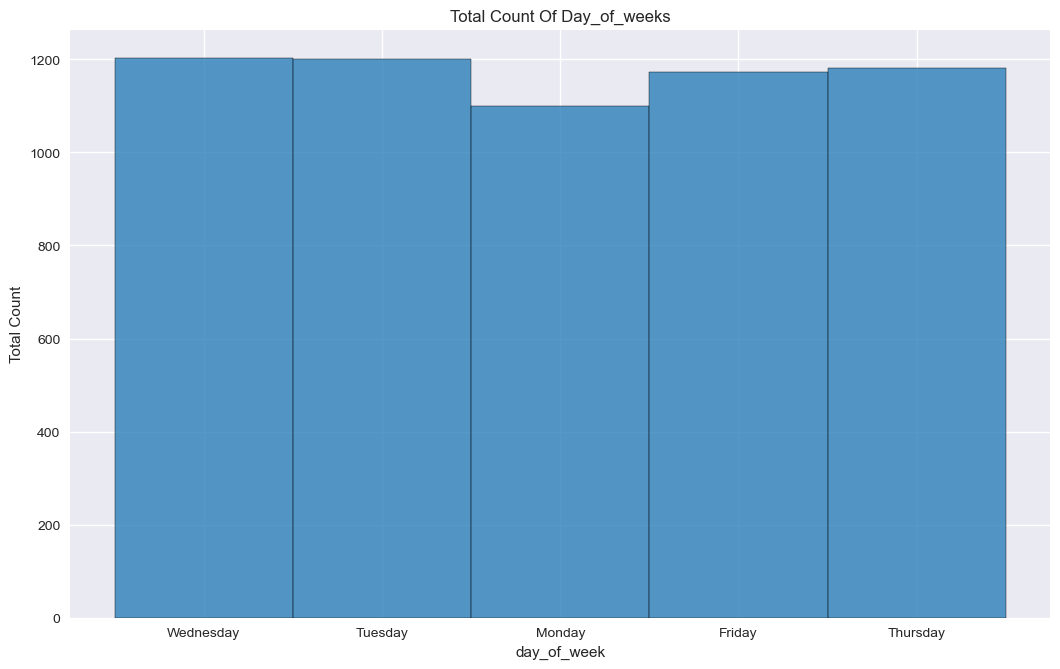

In [10]:
f.plot1(df)

# Is there a relationship between the average count of trades on Monday or Tuesday?


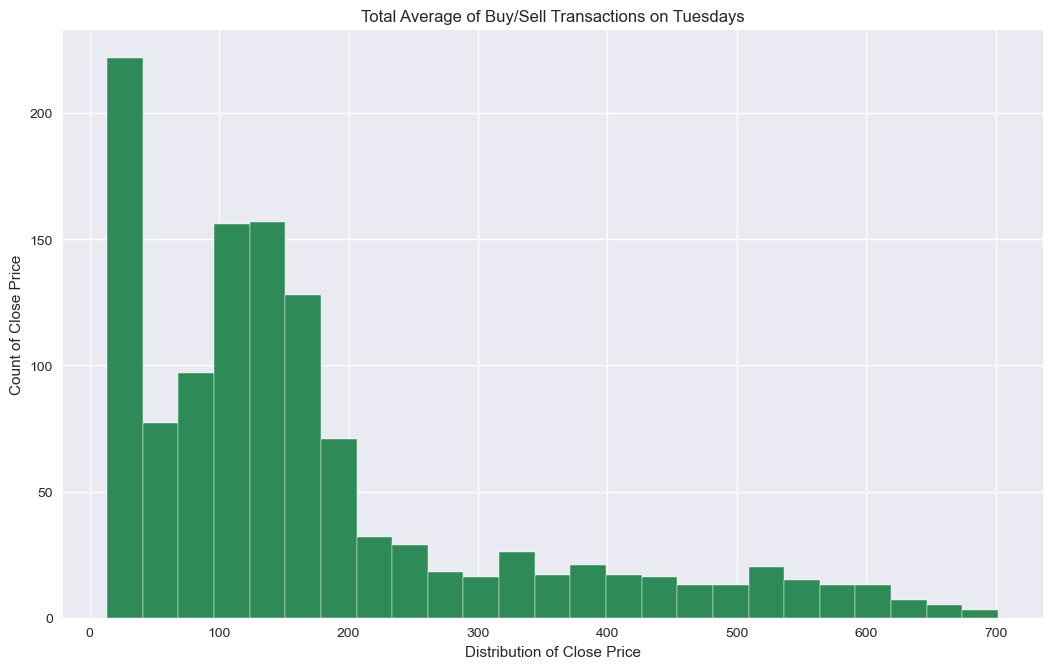

Mean Count of Buy/Sell Transactions on Tuesday: 172.97


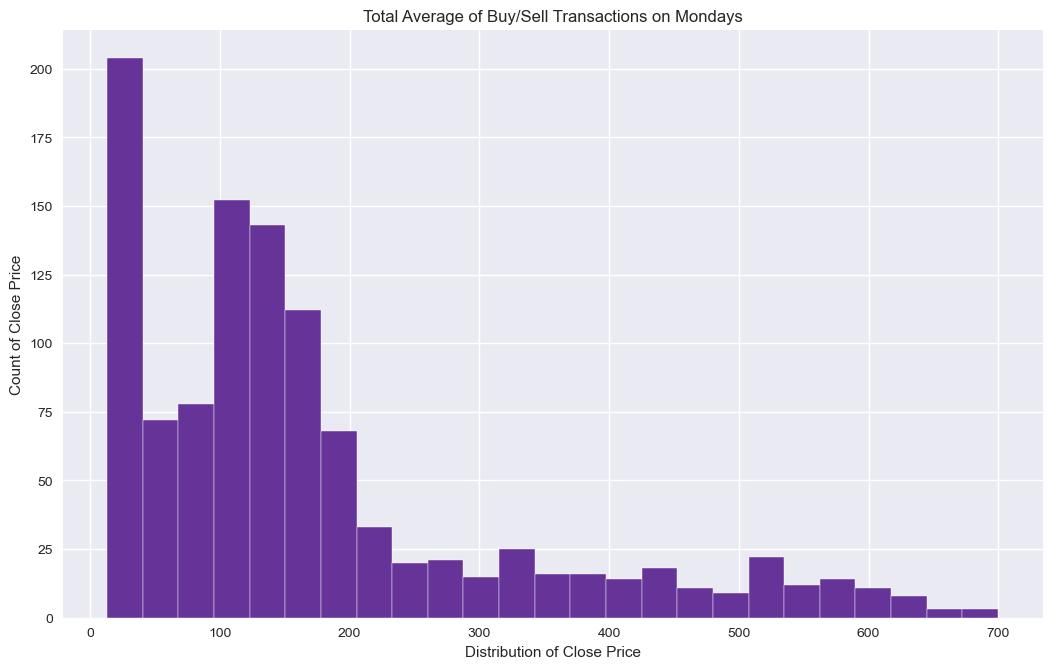

Mean Count of Buy/Sell Transactions on Monday: 172.94


In [11]:
f.plot4(df)

In [12]:
f.ttest(df)

Is t < 0? False
Is p < α: False
We fail to reject the null:
There is no significant relationship between the avg stock prices closed on monday and tuesday


**Takeaways**

* The highest months above 500 total count were March, August, October, December
* The most buy/sell transactions recorded were on Tuesdays and Wednesdays.
* The lowest count is on a Monday.


# Is the data stationary?

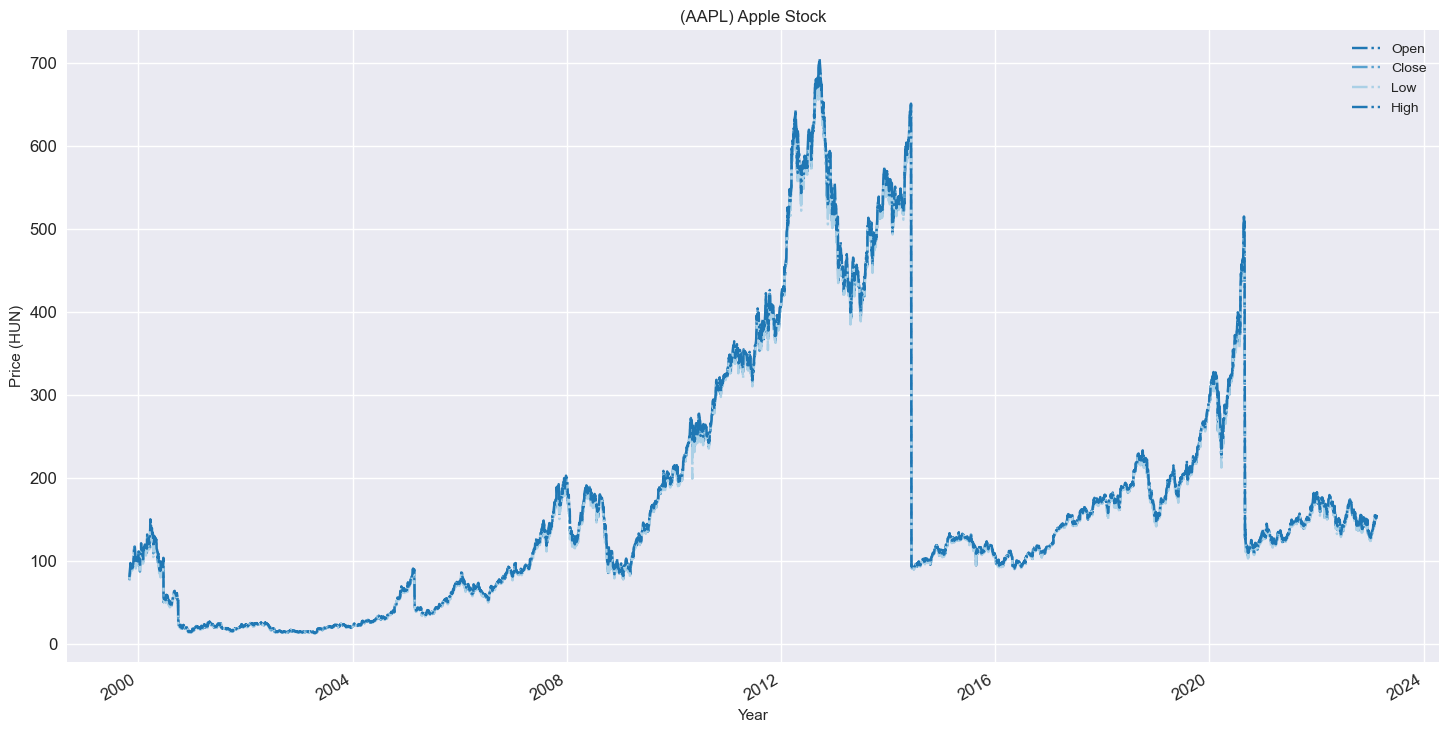

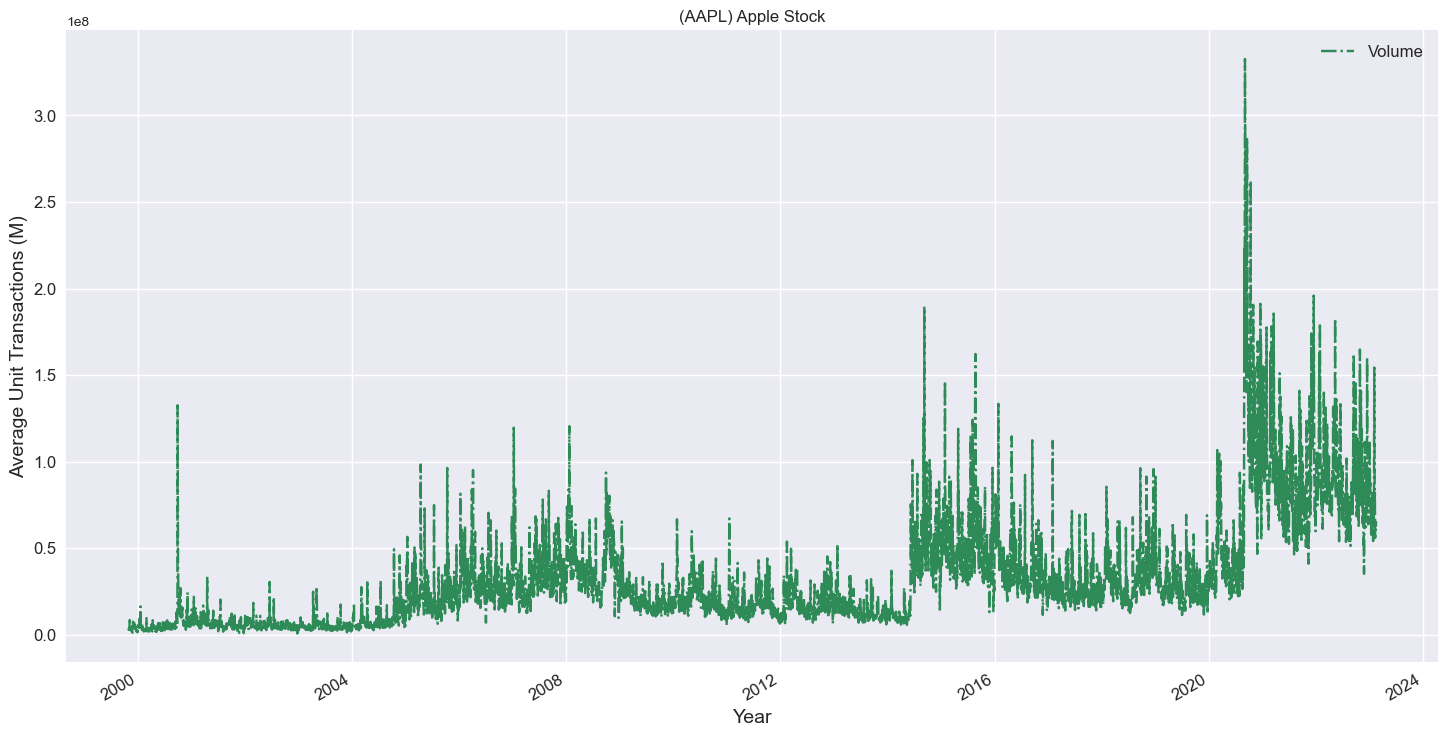

In [13]:
 f.plot5(df)

###### Augmented Dickey–Fuller test


In [14]:
f.adfuller_test(df)

ADF Statistic: -2.418103
p-value: 0.136692
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Failed to Reject Ho - Time Series is Non-Stationary


**Takeaways**

* Our findings show that this data is non-Stationary and contains unconsistent low and high points.
* There are large amounts of buy/sell transaction volumes as price increases/decreases within short periods of time.
* Non-stationary data will be needed to revert to stationary to help accurately forecast stock prices.

# Exploratory Data Analysis

Analysis of each column of stock's **Momentum** (Momentum is the rate of acceleration of a security's price — that is, the speed at which the price is changing)
* Oscillator -  technical analysis tool that constructs high and low bands between two extreme values, and then builds a trend indicator that fluctuates within these bounds.
    * Rate Of Change (ROC), a momentum-based technical indicator that measures the percentage change in price between the current price and the price a certain number of periods ago.
    * RSI (Relative Strength Index), RSI provides technical traders with signals about bullish and bearish price momentum, and it is often plotted beneath the graph of an asset’s price.

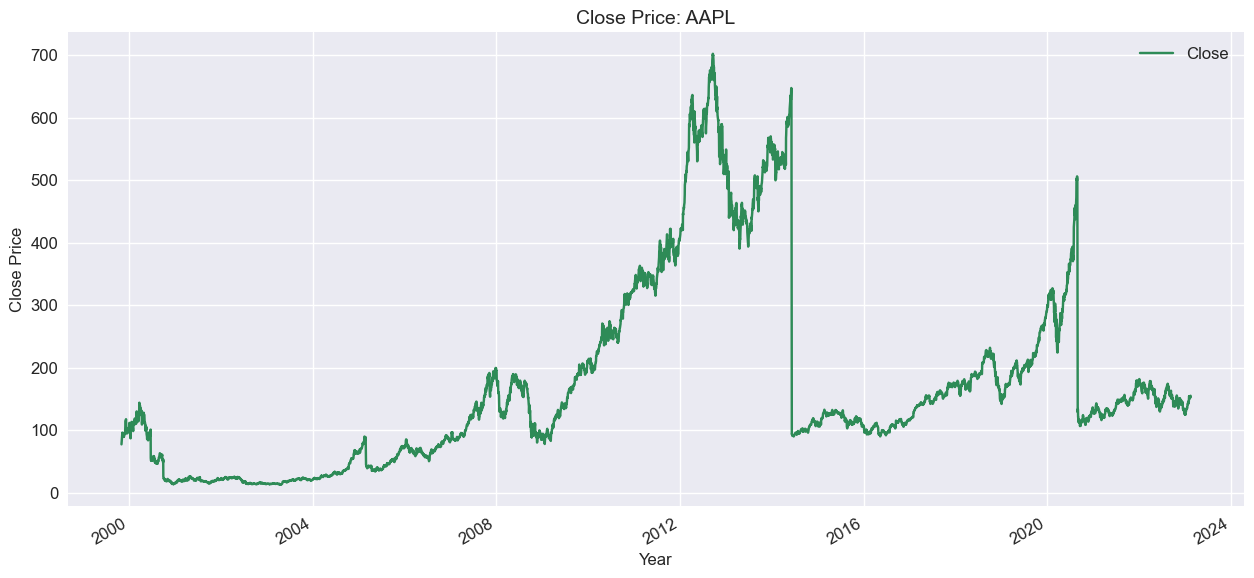

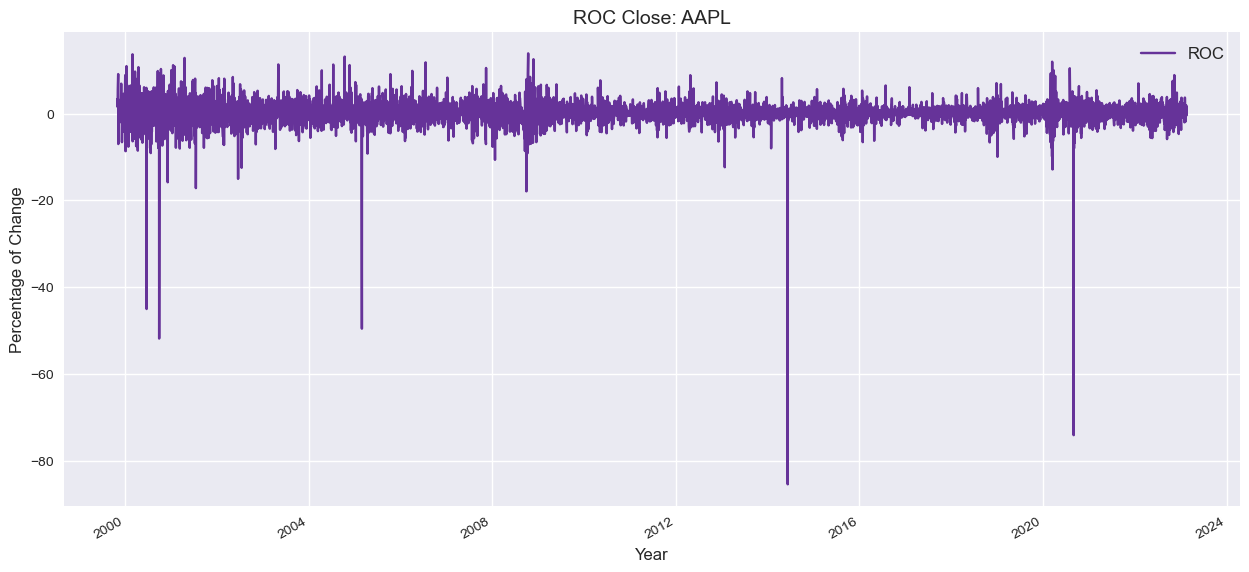

Highest Increase of Change within 1 Period: 13.905
Highest Decrease of Change within 1 Period: -85.486


In [15]:
f.plot6(df)

**Takeaways**
* Findings show that the the high price drops match the momentum of Apple stock. 
* The trend shows steady growth near 2010-2016, the biggest drop in pricing is near 2014-2015. 

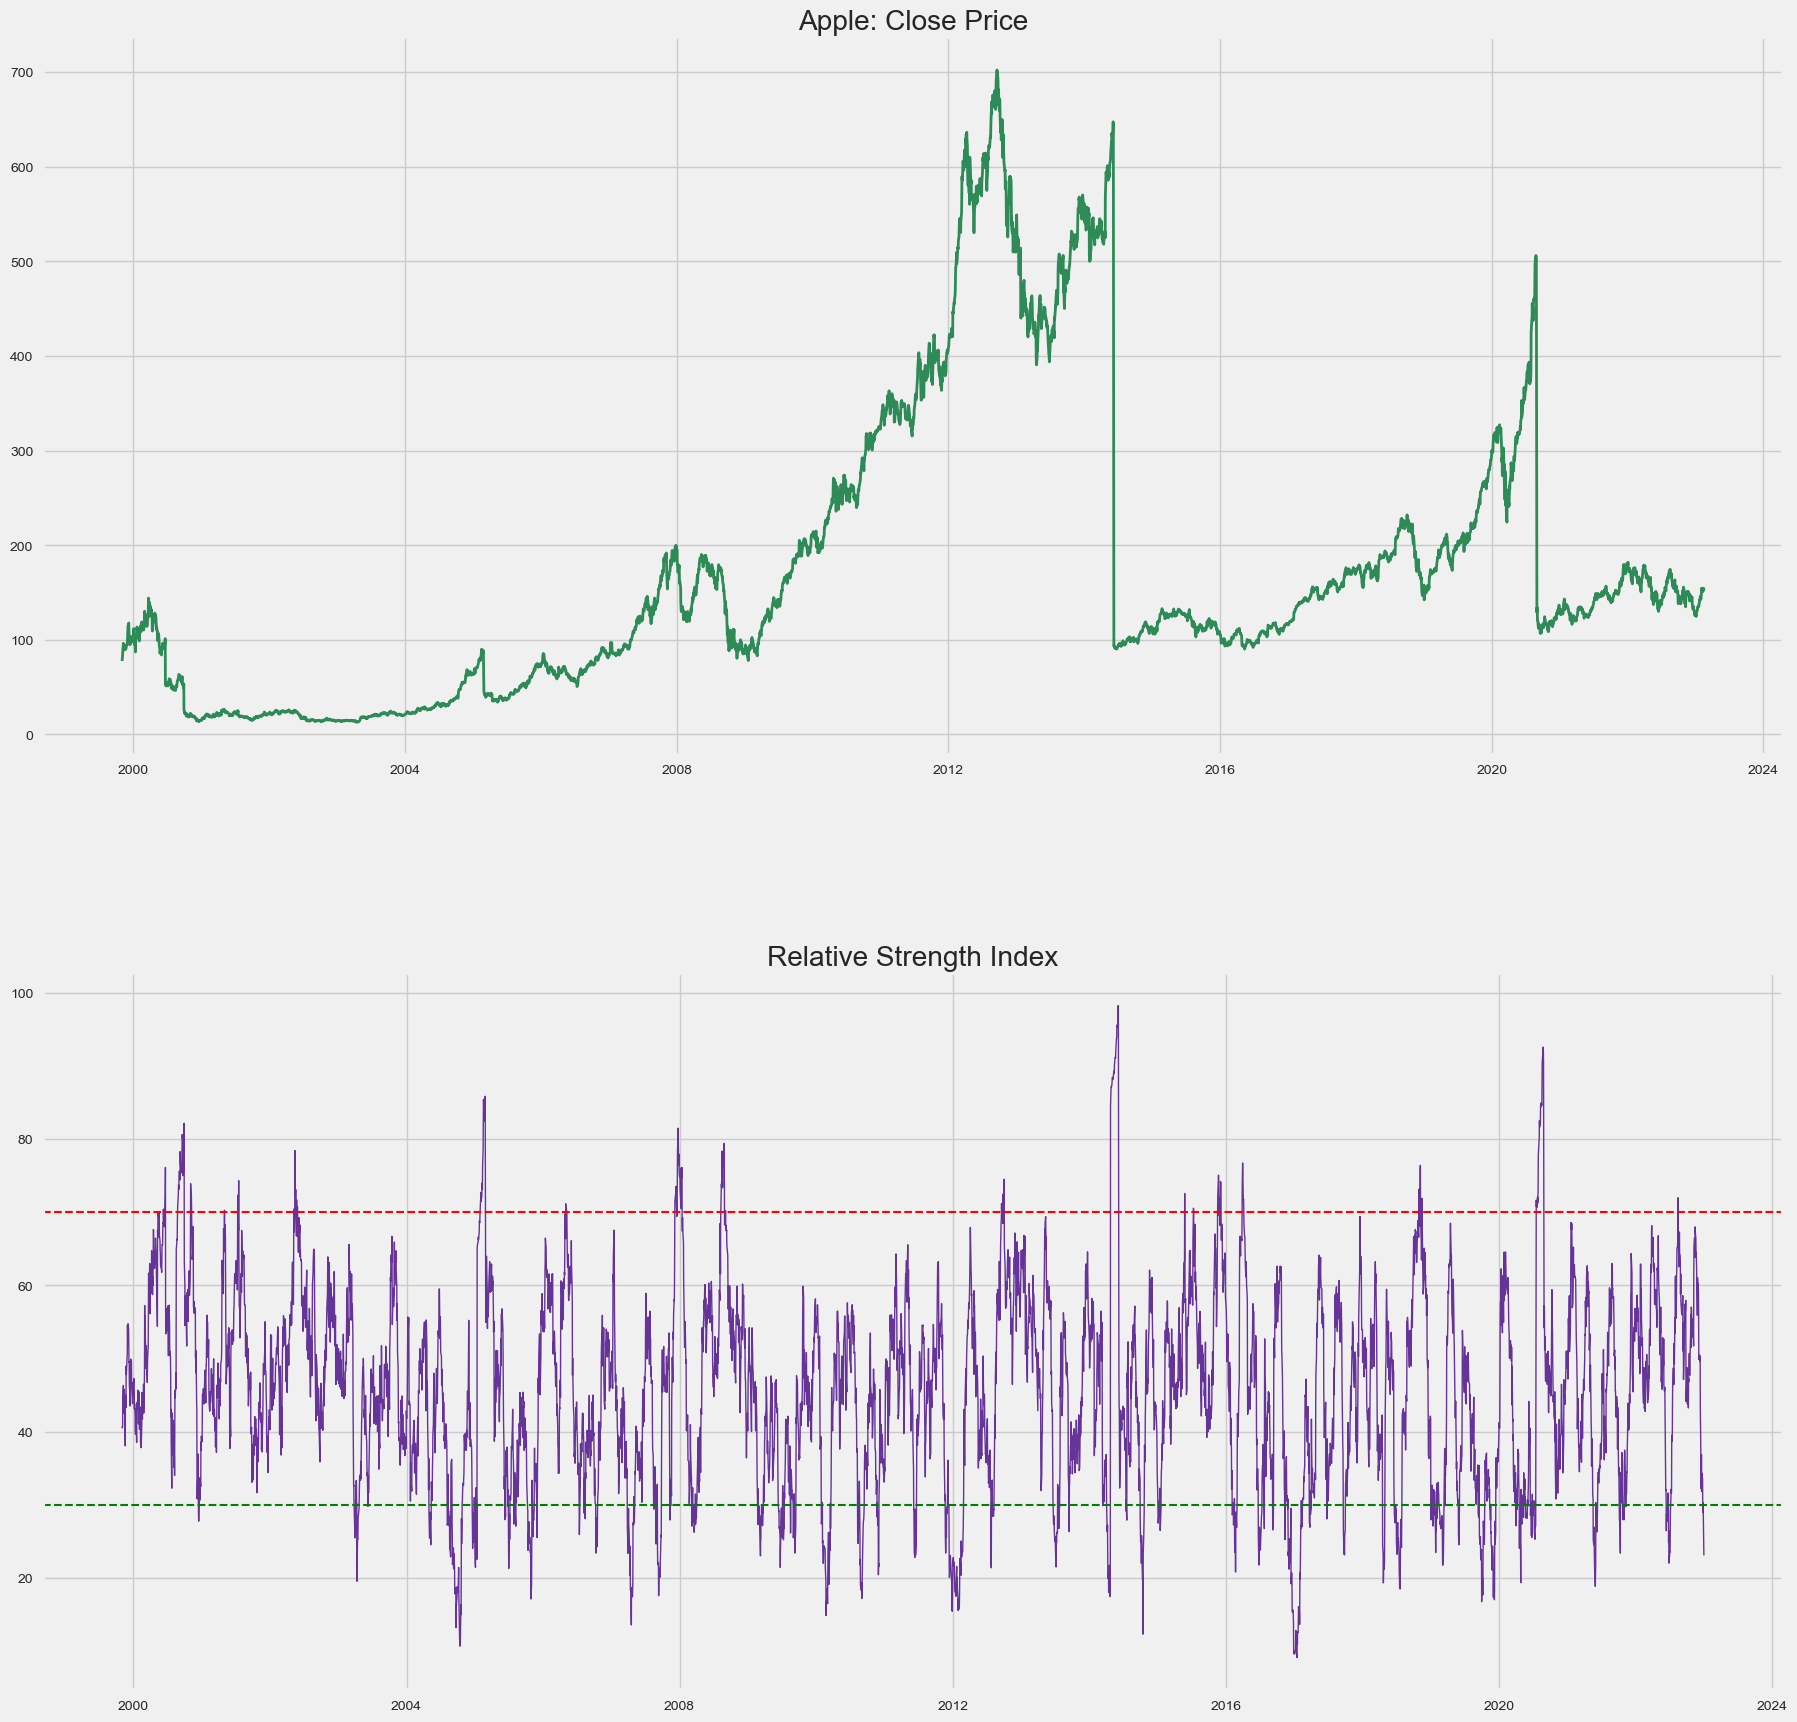

In [16]:
f.plot7(df)

**Takeaways**
* Findings show that the best times to buy/sell were below the 70% thresholds and above the 30% thresholds.
* The biggest drop shows that it was above the 80% RSI, is a good example of overbought and how much momentum the stock has to perform in a bull/bear market. 

# Splitting Data

###### Percentage Based Approach

In [323]:
train, validate, test = f.train__val_test(df)

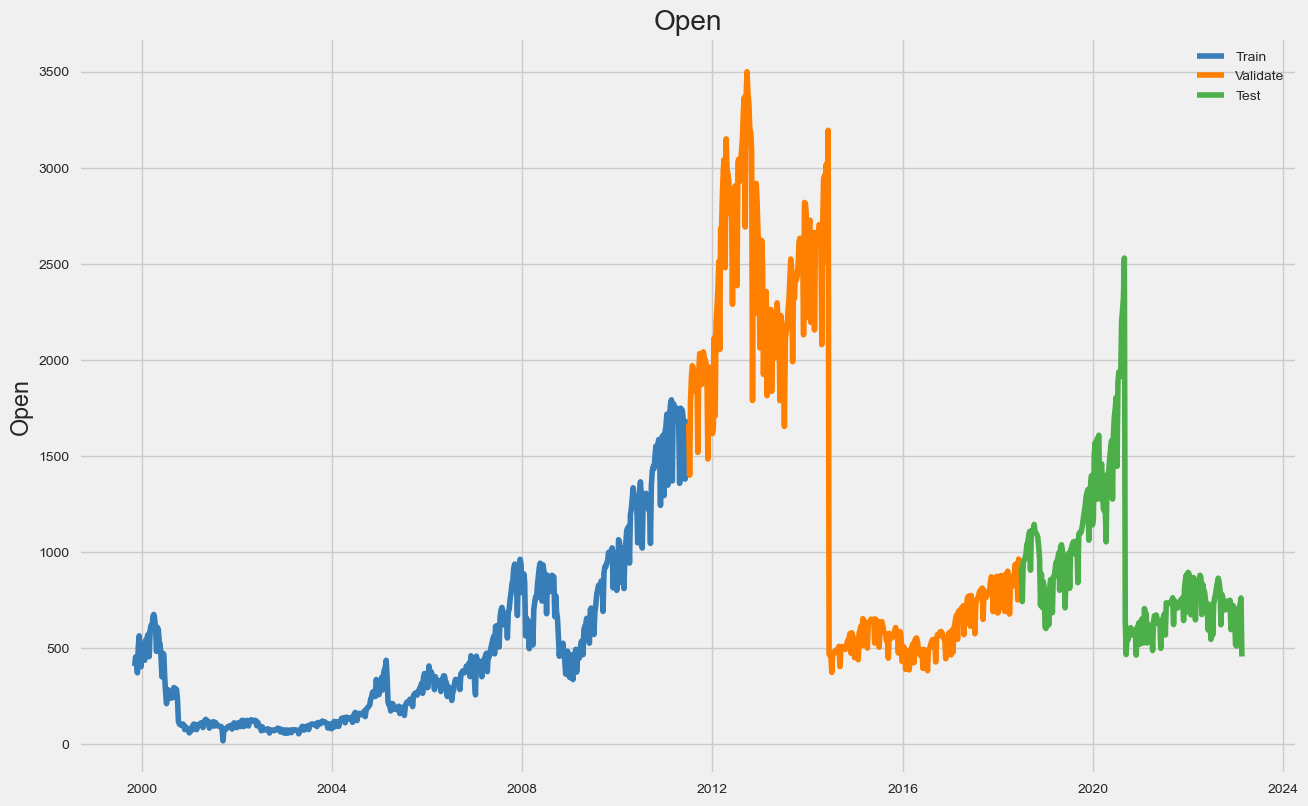

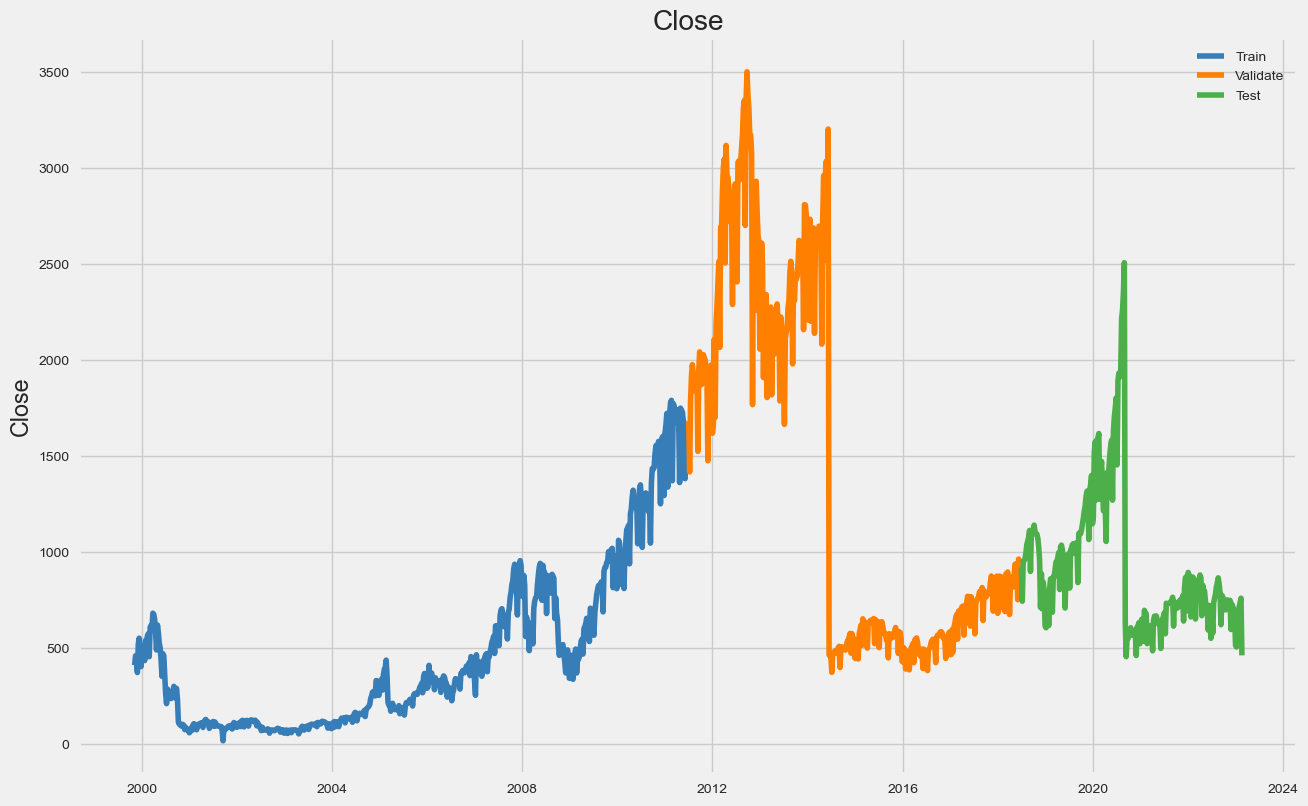

In [324]:
f.plot_sample(train, validate, test)

# Target Variable 

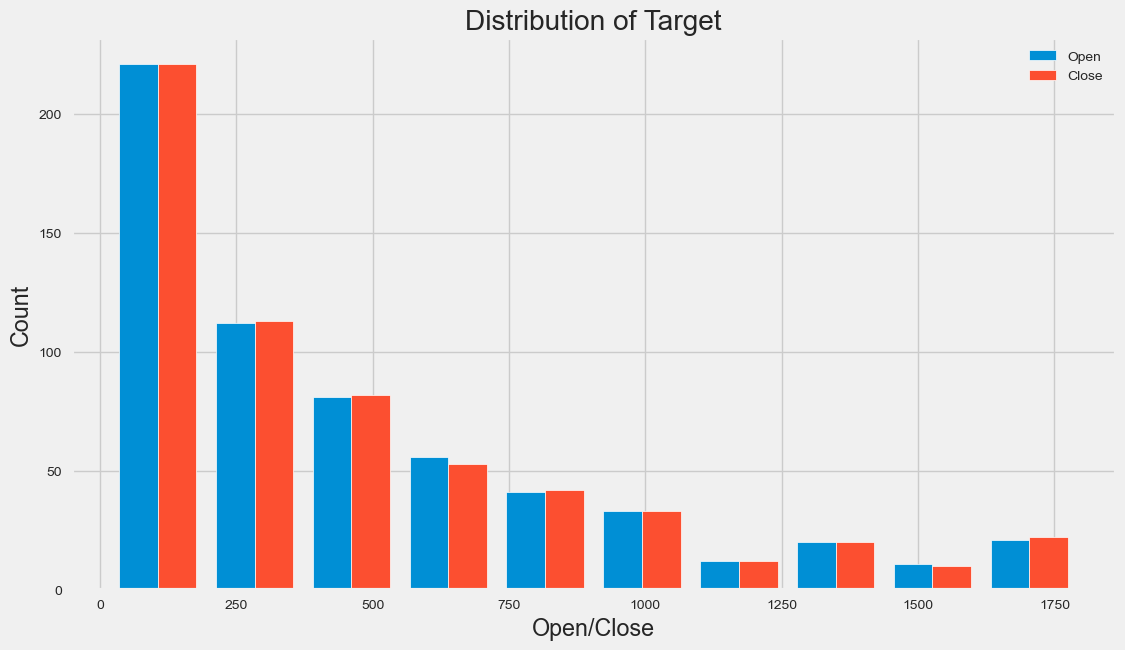

In [325]:
f.plot8(train)

# Baseline Modeling

###### Last Observed Value

In [326]:
f.lov_base(train)

Last Open value:1609.505
Last Close value:1620.81


Open -- RMSE: 975


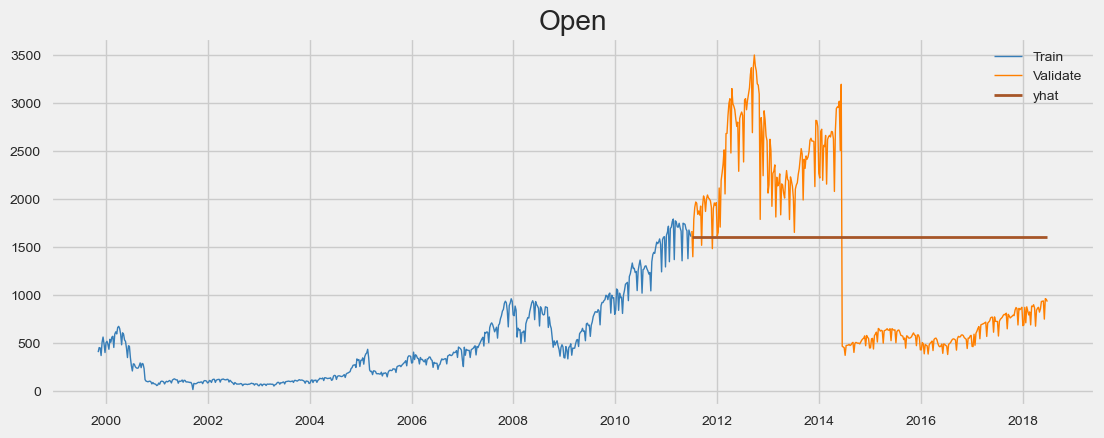

Close -- RMSE: 977


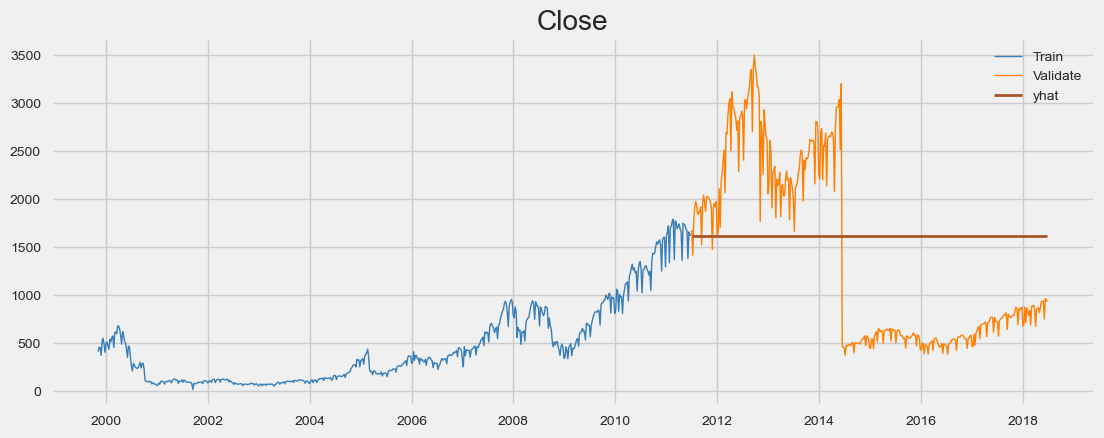

In [327]:

yhat_df = pd.DataFrame(
    {'Open': [last_open],
     'Close': [last_close]},
    index=validate.index)


for col in train.columns:
    plot_and_eval(col)

###### Simple Average

In [328]:
# compute simple average of sales_total (from train data)
avg_close = round(train['Close'].mean(), 2)
avg_close

# compute simple average of quantity (from train data)
avg_open = round(train['Open'].mean(), 2)
avg_open

474.95

Open -- RMSE: 975


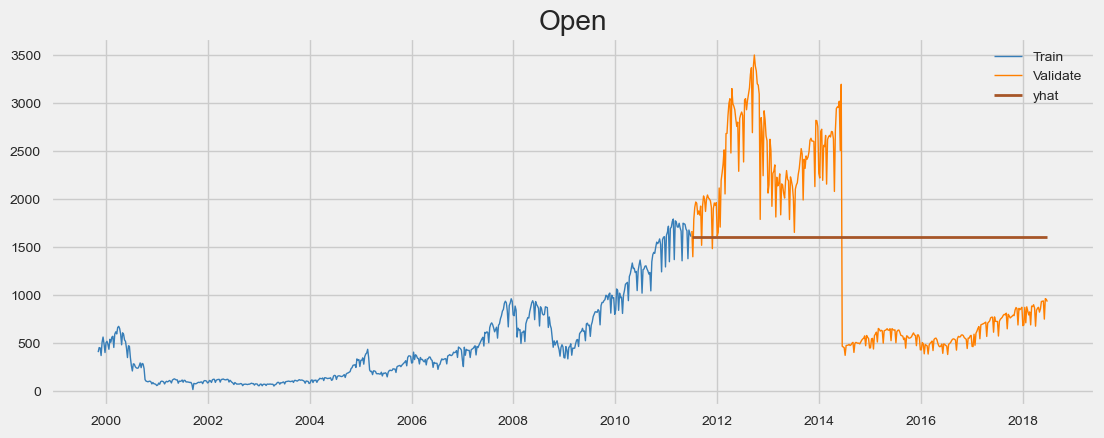

Close -- RMSE: 977


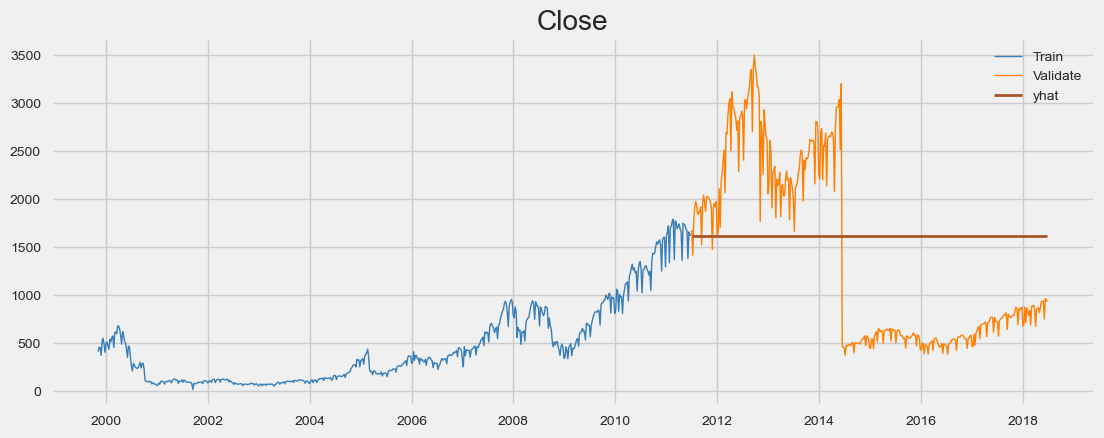

,model_type,target_var,rmse
0,30d_moving_avg,Open,981.0
1,30d_moving_avg,Close,980.0
2,4_day_moving_avg,Open,968.0
3,4_day_moving_avg,Close,966.0
4,12_day_moving_avg,Open,981.0
...,...,...,...
119,previous_year,Close,691.0
120,previous_year,Open,692.0
121,previous_year,Close,691.0
122,simple_average,Open,975.0


In [329]:
for col in train.columns:
    plot_and_eval(col)



for col in train.columns:
    eval_df = append_eval_df(model_type='simple_average', 
                            target_var = col)
eval_df

###### 30-day MA(Moving Average)

Open -- RMSE: 981


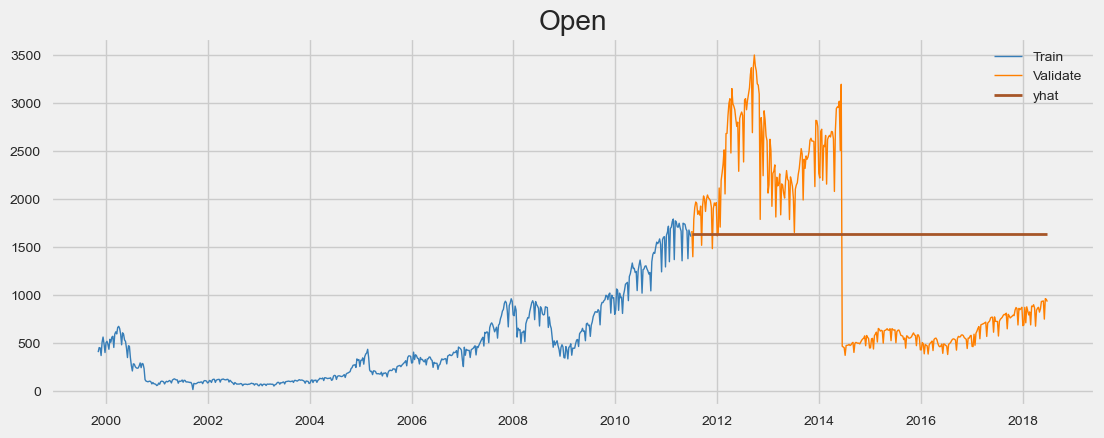

Close -- RMSE: 980


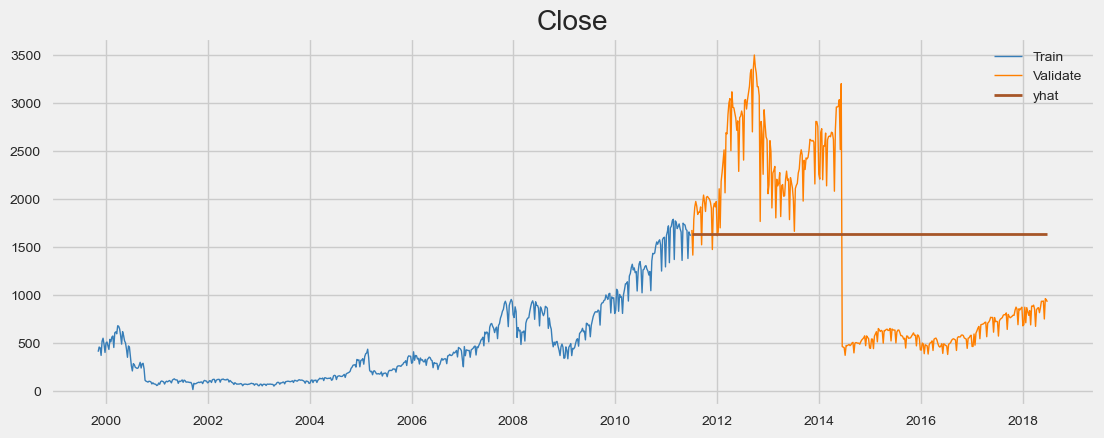

,model_type,target_var,rmse
0,30d_moving_avg,Open,981.0
1,30d_moving_avg,Close,980.0
2,4_day_moving_avg,Open,968.0
3,4_day_moving_avg,Close,966.0
4,12_day_moving_avg,Open,981.0
...,...,...,...
121,previous_year,Close,691.0
122,simple_average,Open,975.0
123,simple_average,Close,977.0
124,30d_moving_avg,Open,981.0


In [330]:
period=30
train['Close'].rolling(period).mean()

train['Close'].rolling(period).mean()[-1]

# Saving the last 30 day moving average for each column
rolling_open = round(train['Open'].rolling(period).mean()[-1], 2)
rolling_close = round(train['Close'].rolling(period).mean()[-1], 2)


yhat_df = make_baseline_predictions(rolling_open, rolling_close)


for col in train.columns:
    plot_and_eval(col)

for col in train.columns:
    eval_df = append_eval_df(model_type = '30d_moving_avg', 
                            target_var = col)

eval_df

Open -- RMSE: 981


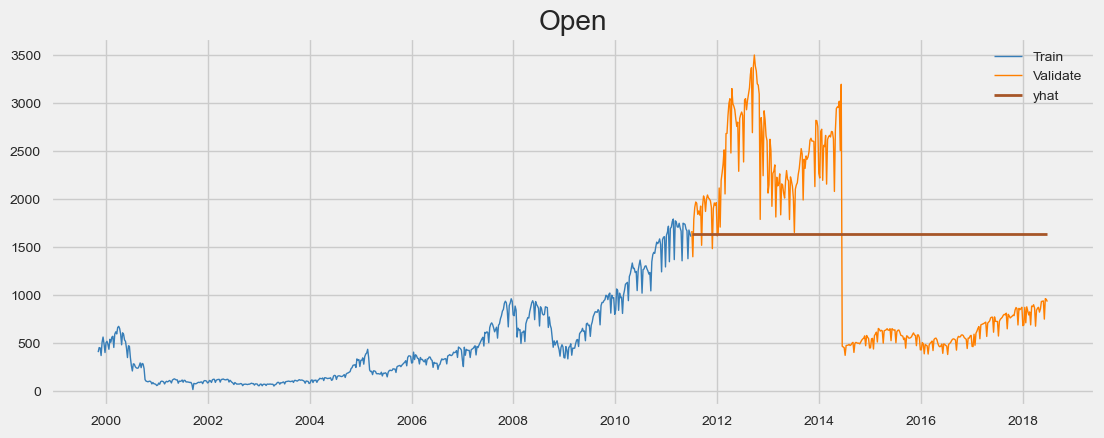

Close -- RMSE: 980


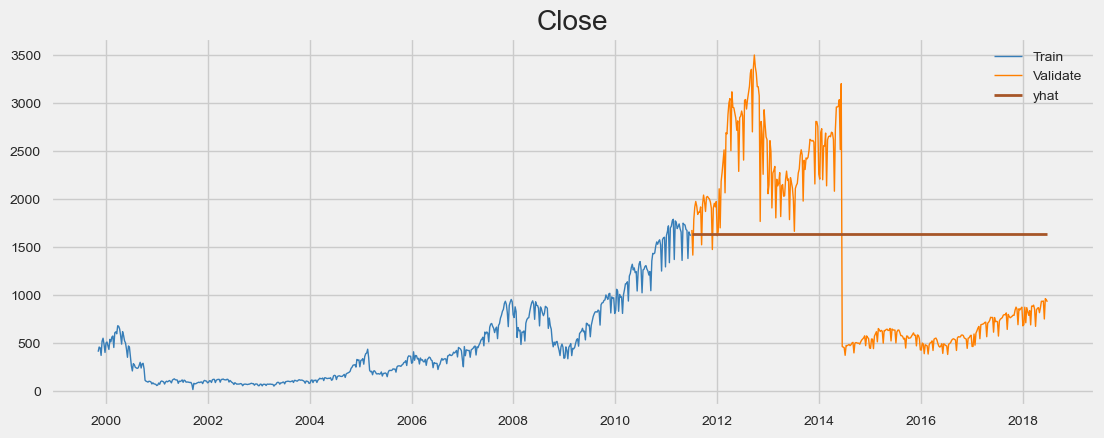

In [331]:

period=30
train['Close'].rolling(period).mean()

train['Close'].rolling(period).mean()[-1]

# Saving the last 30 day moving average for each column
rolling_open = round(train['Open'].rolling(period).mean()[-1], 2)
rolling_close = round(train['Close'].rolling(period).mean()[-1], 2)


yhat_df = make_baseline_predictions(rolling_open, rolling_close)


for col in train.columns:
    plot_and_eval(col)

for col in train.columns:
    eval_df = append_eval_df(model_type = '30d_moving_avg', 
                            target_var = col)


periods = [4, 12, 26, 52, 104]

for p in periods: 
    rolling_open = round(train['Open'].rolling(p).mean()[-1], 2)
    rolling_close = round(train['Close'].rolling(p).mean()[-1], 2)
    yhat_df = make_baseline_predictions(rolling_open, rolling_close)
    model_type = str(p) + '_day_moving_avg'
    for col in train.columns:
        eval_df = append_eval_df(model_type = model_type,
                                target_var = col)

eval_df

best_open_rmse = eval_df[eval_df.target_var == 'Open']['rmse'].min()

best_open_rmse




best_close_total_rmse = eval_df[eval_df.target_var == 'Close']['rmse'].min()



In [332]:
eval_df[eval_df.rmse == best_open_rmse]

,model_type,target_var,rmse
34,holts_seasonal_add_add,Open,327.0


In [333]:

eval_df[eval_df.rmse == best_close_total_rmse]

,model_type,target_var,rmse
35,holts_seasonal_add_add,Close,139.0


# Holt winter Model

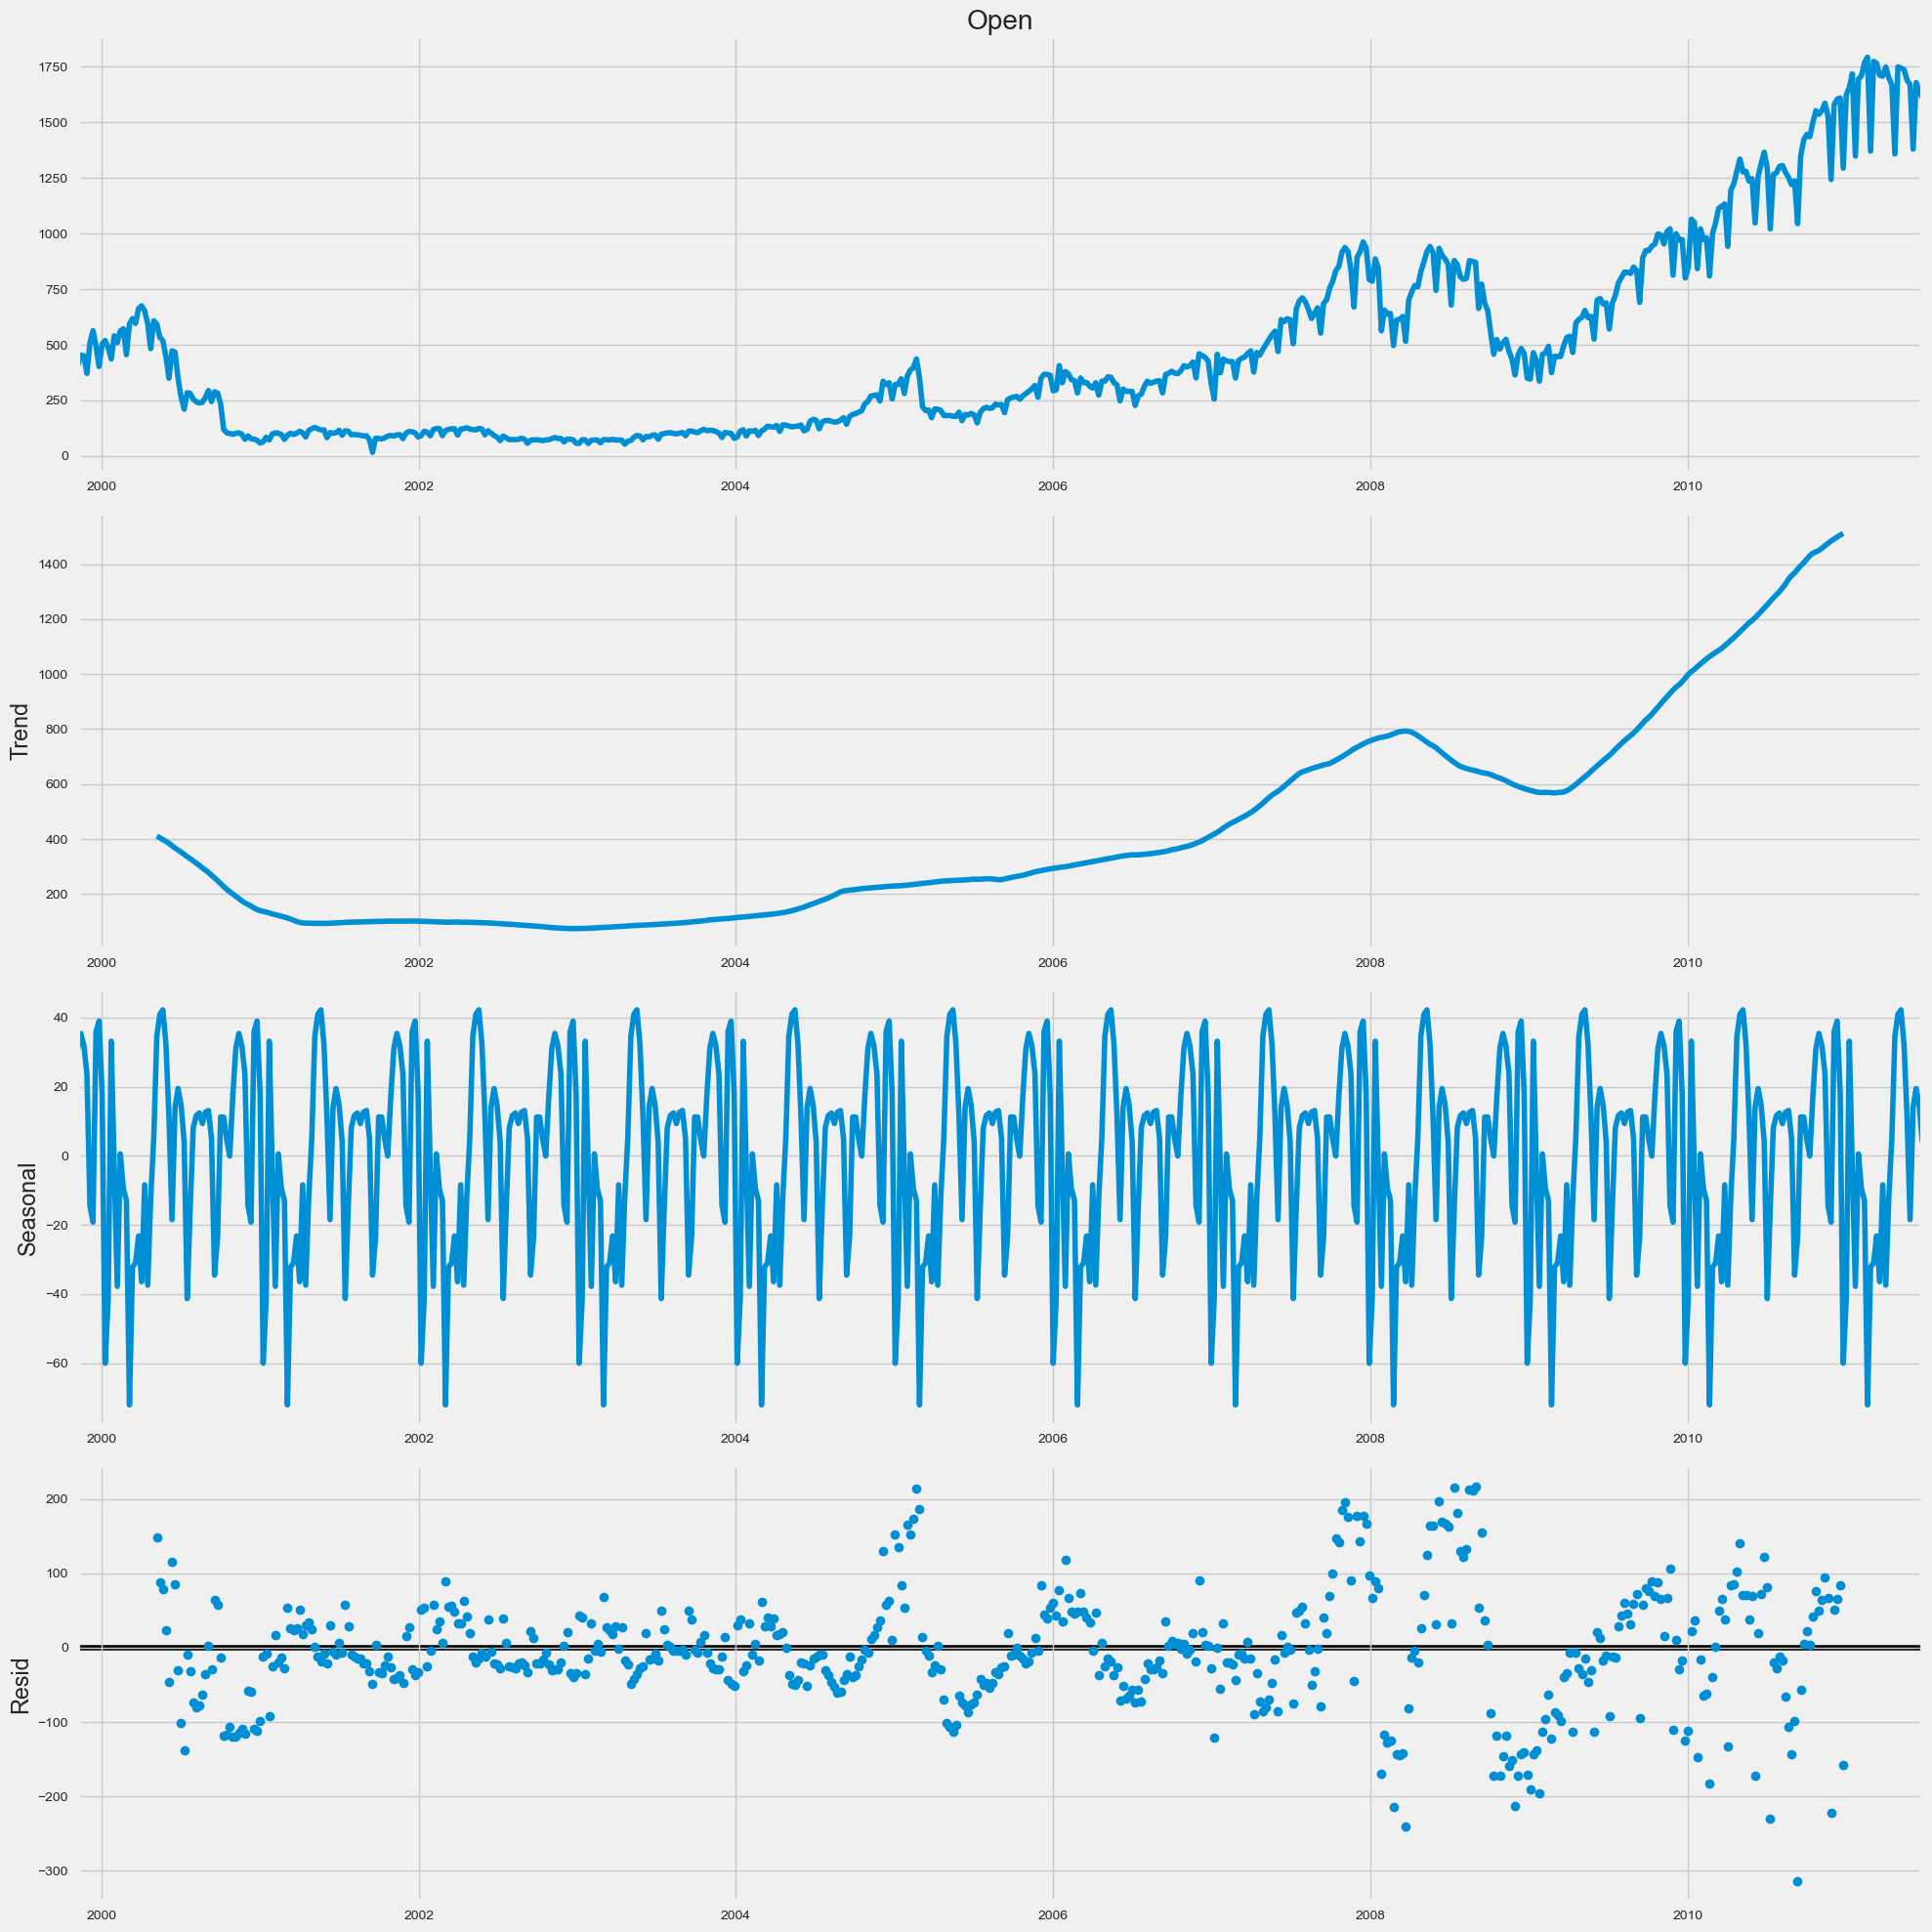

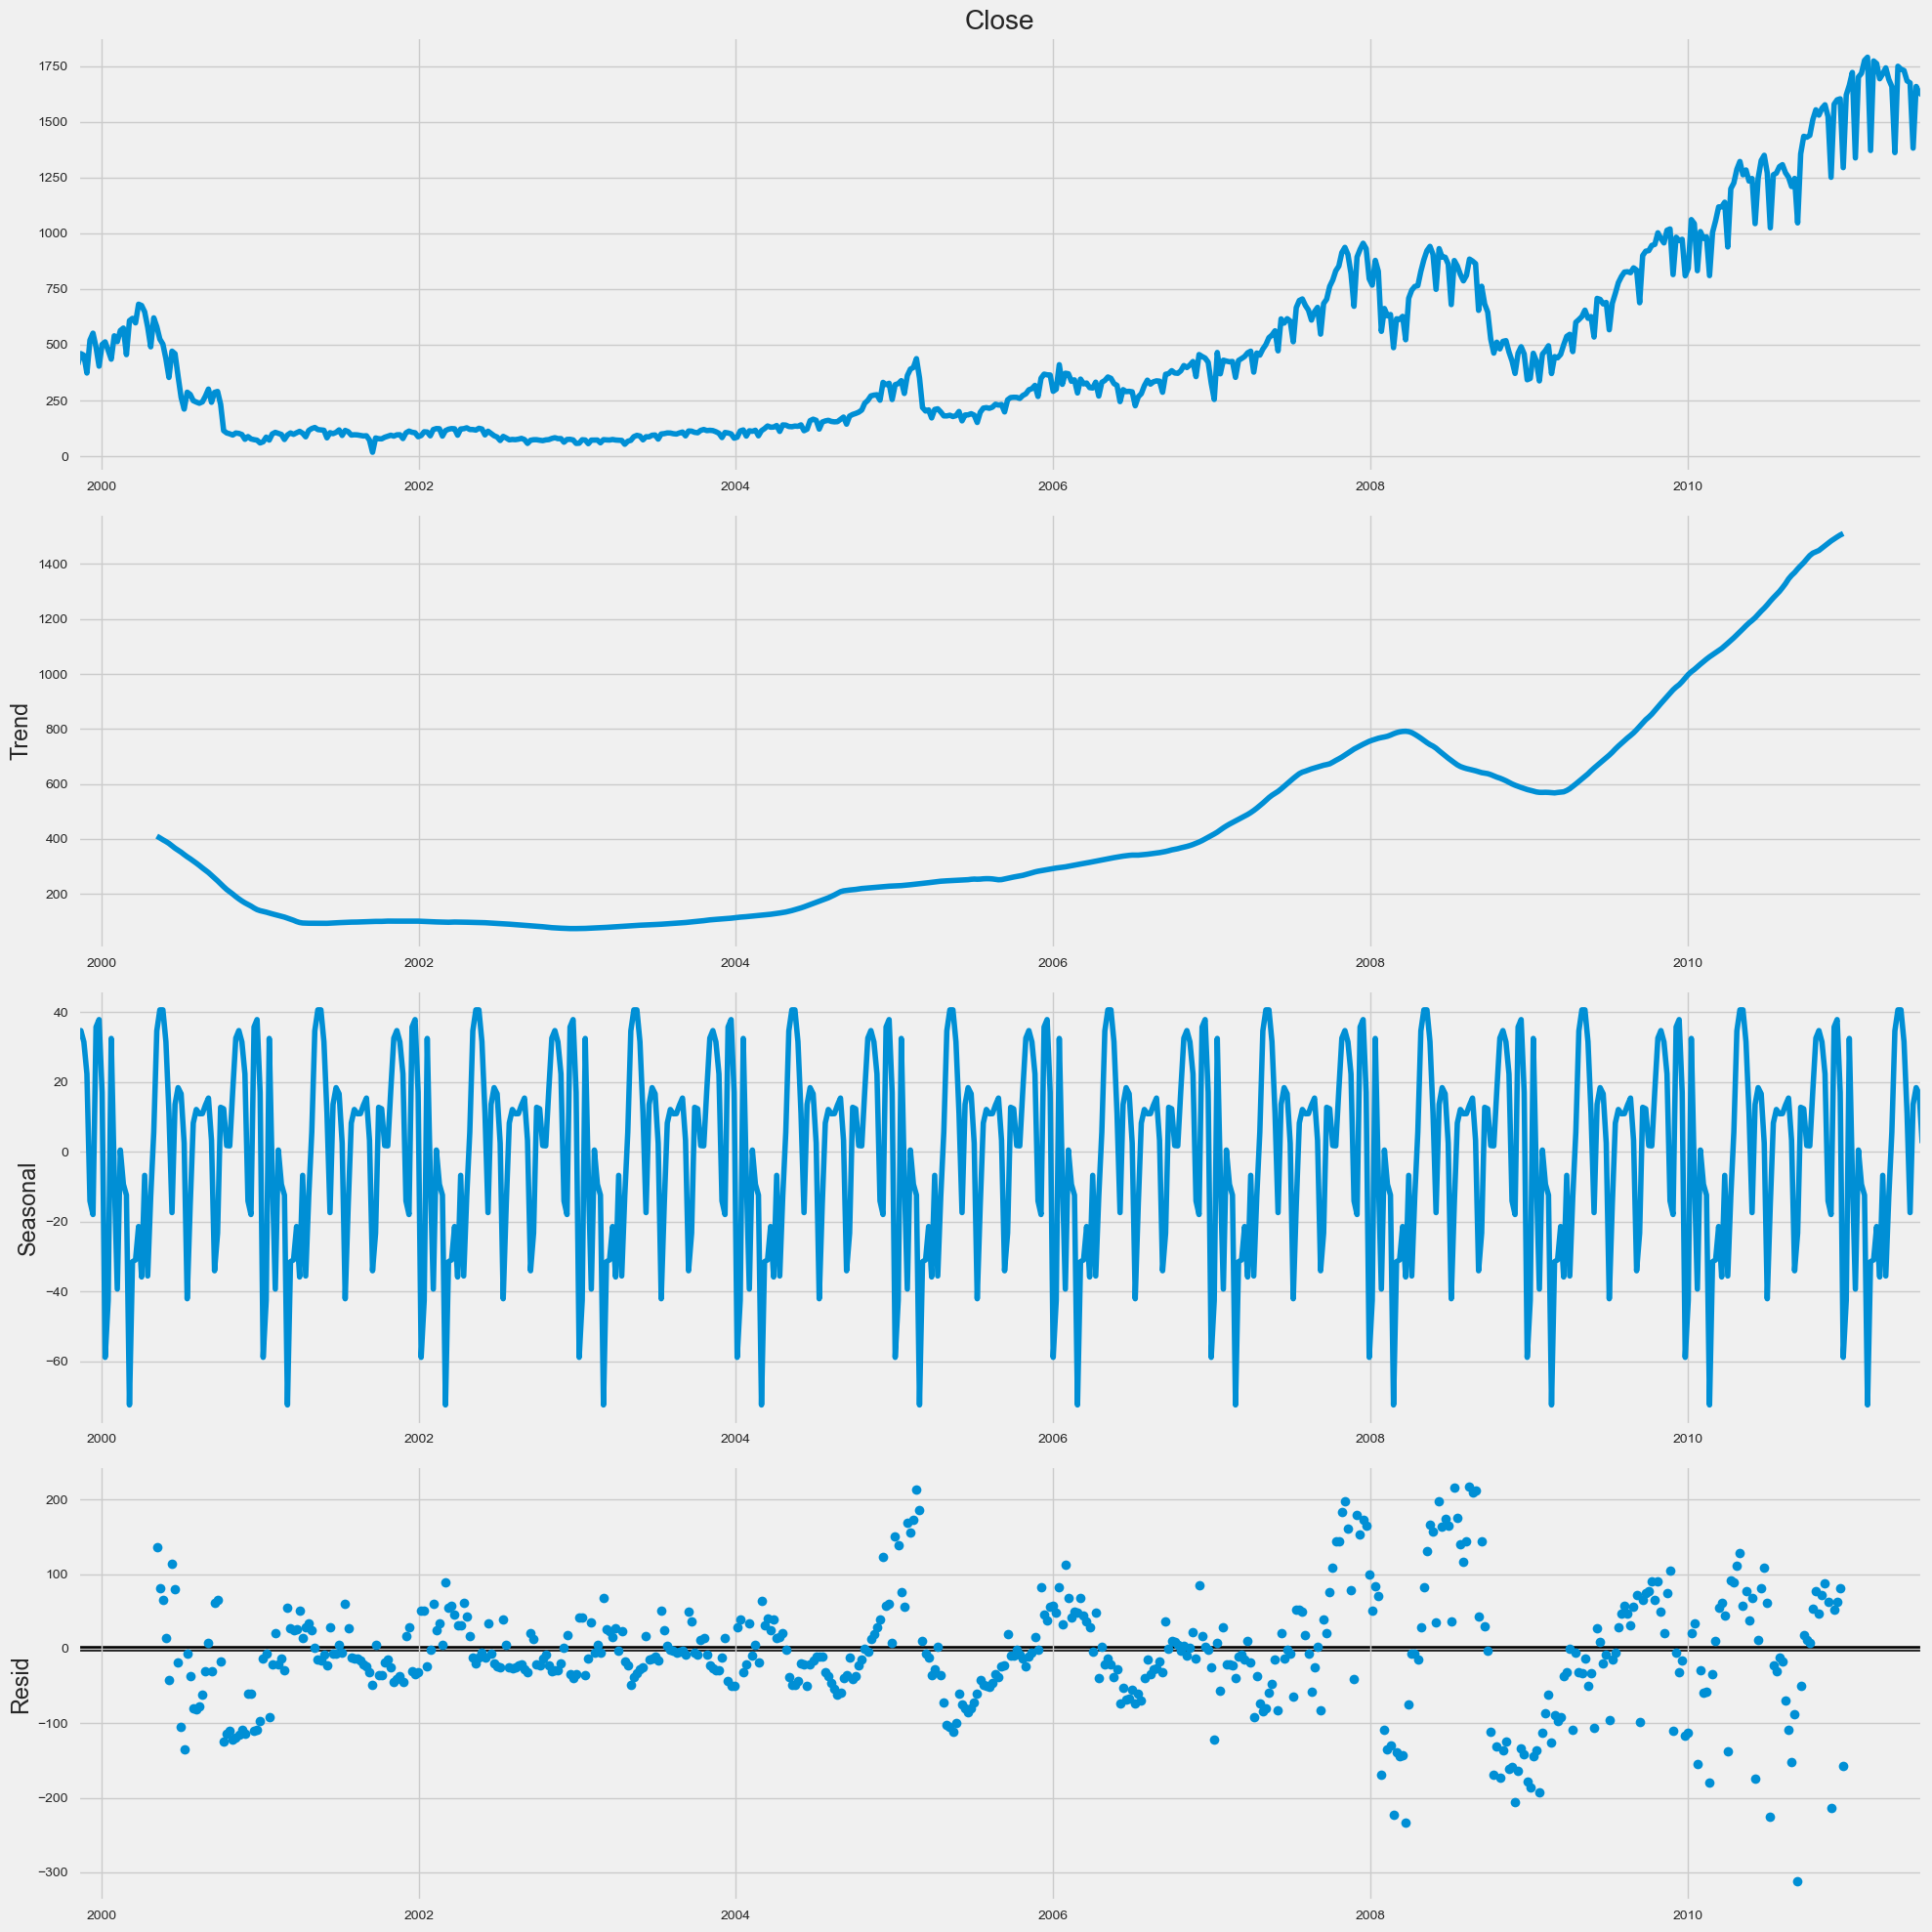

In [334]:


for col in train.columns:
    sm.tsa.seasonal_decompose(train[col].resample('W').mean()).plot()



### Holt's Linear Model


Open -- RMSE: 969


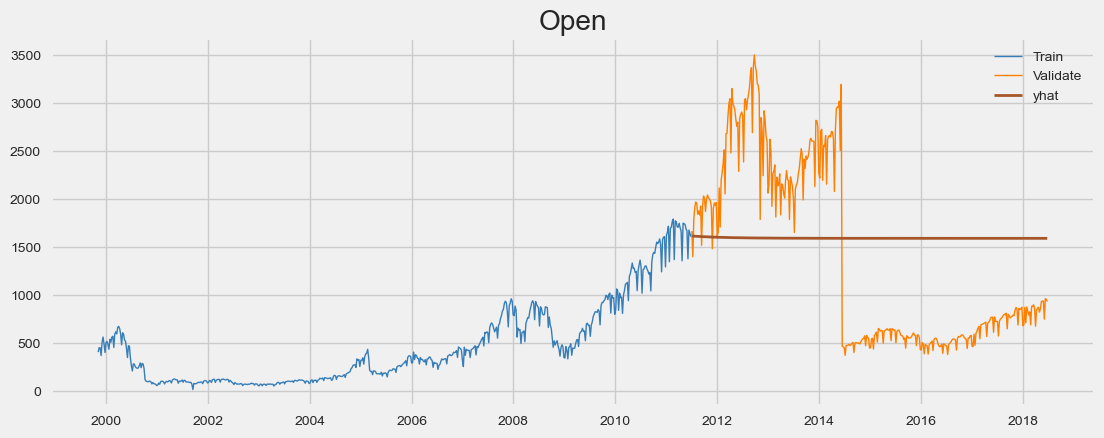

Close -- RMSE: 973


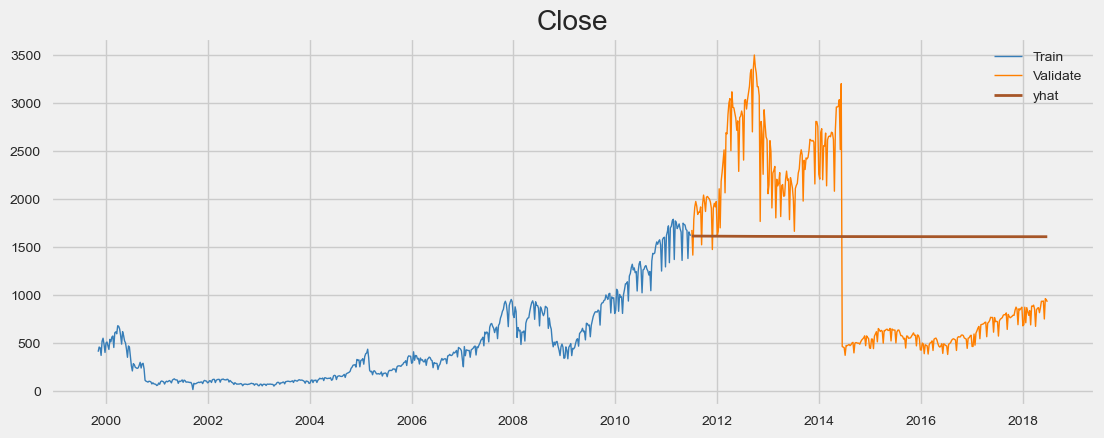

,model_type,target_var,rmse
35,holts_seasonal_add_add,Close,139.0
34,holts_seasonal_add_add,Open,327.0
59,previous_year,Close,691.0
57,previous_year,Close,691.0
93,previous_year,Close,691.0
...,...,...,...
88,holts_seasonal_add_add,Open,1316.0
116,previous_year,Open,1316.0
90,previous_year,Open,1316.0
114,holts_seasonal_add_add,Open,1316.0


In [335]:
col = 'Close' 
# create our Holt Object
model = Holt(train[col], exponential=False, damped=True)

# fit the Holt object
model = model.fit(optimized=True)

yhat_close_total = model.predict(start = validate.index[0],
                              end = validate.index[-1])

yhat_close_total

# doing this in a loop for each column
for col in train.columns:
    model = Holt(train[col], exponential=False, damped=True)
    model = model.fit(optimized=True)
    yhat_values = model.predict(start = validate.index[0],
                              end = validate.index[-1])
    yhat_df[col] = round(yhat_values, 2)

for col in train.columns:
    plot_and_eval(target_var = col)

for col in train.columns:
    eval_df = append_eval_df(model_type = 'holts_optimized', 
                            target_var = col)

eval_df.sort_values(by='rmse')

# Holt Seasonal Trend

Open -- RMSE: 1316


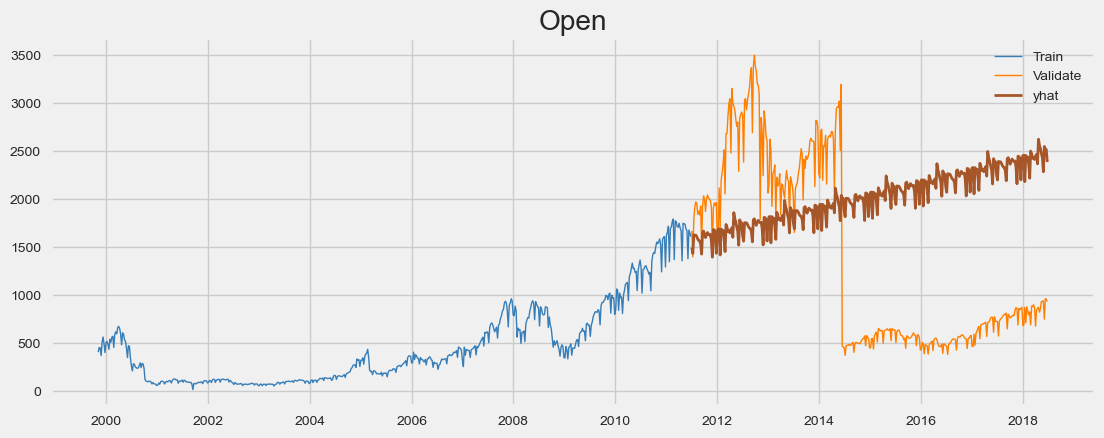

Close -- RMSE: 955


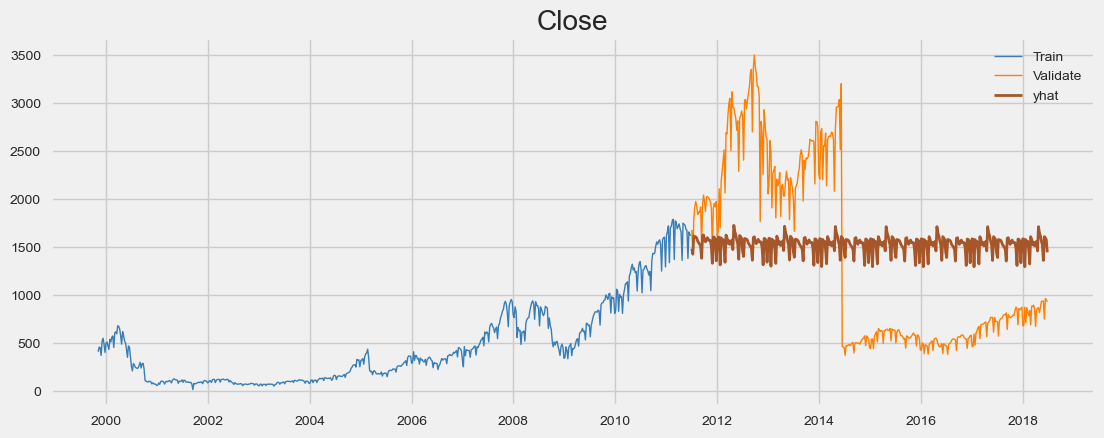

,model_type,target_var,rmse
35,holts_seasonal_add_add,Close,139.0
34,holts_seasonal_add_add,Open,327.0
119,previous_year,Close,691.0
69,previous_year,Close,691.0
67,previous_year,Close,691.0
...,...,...,...
54,holts_seasonal_add_add,Open,1316.0
116,previous_year,Open,1316.0
114,holts_seasonal_add_add,Open,1316.0
30,holts_seasonal_add_add,Open,1316.0


In [336]:


# Models for quantity
hst_open_fit1 = ExponentialSmoothing(train['Open'], seasonal_periods=52, trend='add', seasonal='add').fit()
hst_open_fit2 = ExponentialSmoothing(train['Open'], seasonal_periods=52, trend='add', seasonal='mul').fit()
hst_open_fit3 = ExponentialSmoothing(train['Open'], seasonal_periods=52, trend='add', seasonal='add', damped=True).fit()
hst_open_fit4 = ExponentialSmoothing(train['Open'], seasonal_periods=52, trend='add', seasonal='mul', damped=True).fit()

# Models for sales
hst_close_fit1 = ExponentialSmoothing(train['Close'], seasonal_periods=52, trend='add', seasonal='add').fit()
hst_close_fit2 = ExponentialSmoothing(train['Close'], seasonal_periods=52, trend='add', seasonal='mul').fit()
hst_close_fit3 = ExponentialSmoothing(train['Close'], seasonal_periods=52, trend='add', seasonal='add', damped=True).fit()
hst_close_fit4 = ExponentialSmoothing(train['Close'], seasonal_periods=52, trend='add', seasonal='mul', damped=True).fit()


results_open=pd.DataFrame({'model':['hst_open_fit1', 'hst_open_fit2', 'hst_open_fit3', 'hst_open_fit4'],
                              'SSE':[hst_open_fit1.sse, hst_open_fit2.sse, hst_open_fit3.sse, hst_open_fit4.sse]})
results_open

results_open.sort_values(by='SSE')

results_close=pd.DataFrame({'model':['hst_close_fit1', 'hst_close_fit2', 'hst_close_fit3', 'hst_close_fit4'],
                              'SSE':[hst_close_fit1.sse, hst_close_fit2.sse, hst_close_fit3.sse, hst_close_fit4.sse]})
results_close

results_close.sort_values(by='SSE')

yhat_df = pd.DataFrame({'Open': hst_open_fit1.forecast(validate.shape[0]),
                           'Close': hst_close_fit3.forecast(validate.shape[0])},
                          index=validate.index)
yhat_df

for col in train.columns:
    plot_and_eval(col)

eval_df

for col in train.columns:
    eval_df = append_eval_df(model_type = 'holts_seasonal_add_add', 
                            target_var = col)

eval_df.sort_values(by='rmse')

In [337]:
validate.head()

,Open,Close
2011-07-03,1667.93,1680.27
2011-07-10,1399.96,1418.10
2011-07-17,1790.38,1788.46
2011-07-24,1914.82,1918.14
2011-07-31,1970.20,1976.80


Open -- RMSE: 1316


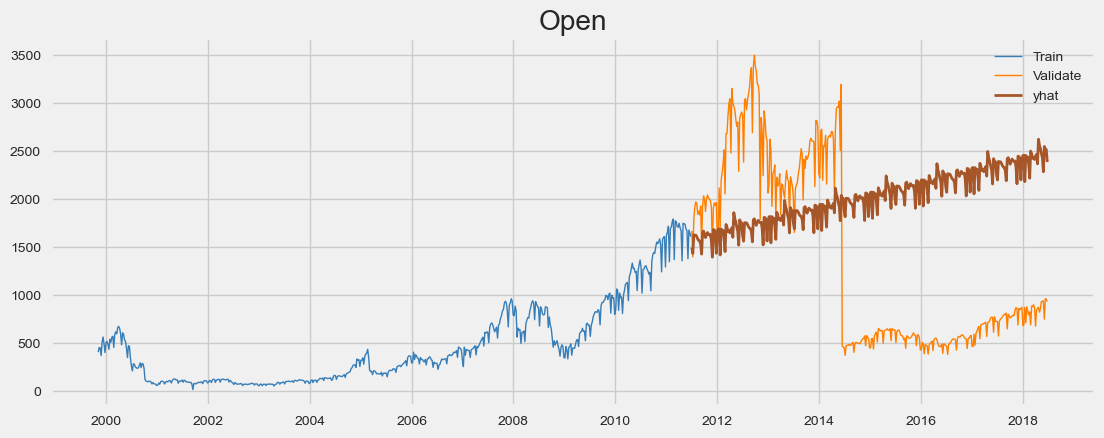

Close -- RMSE: 955


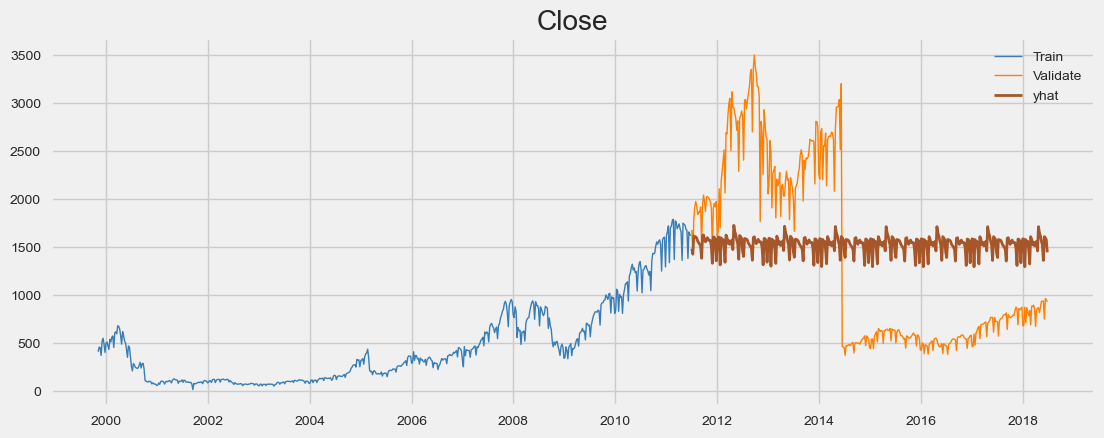

,model_type,target_var,rmse
34,holts_seasonal_add_add,Open,327.0
35,holts_seasonal_add_add,Close,139.0


In [338]:

for col in train.columns:
    plot_and_eval(target_var = col)
    eval_df = append_eval_df(model_type = "previous_year", 
                            target_var = col)



eval_df.sort_values(by='rmse')

open_total_min_rmse = eval_df.groupby('target_var')['rmse'].min()[0]

close_min_rmse = eval_df.groupby('target_var')['rmse'].min()[1]

# find which model that is
eval_df[((eval_df.rmse == open_total_min_rmse) | 
         (eval_df.rmse == close_min_rmse))]


In [339]:
train = df_resampled[:'2016']
validate = df_resampled['2017']
test = df_resampled['2018']

print(train.shape)
print(validate.shape)
print(test.shape)

train.head()
train.tail()

train.diff(365)

yhat_df = train['2016'] + train.diff(365).mean()
yhat_df

train.loc['2016'].head()

pd.concat([yhat_df.head(1), validate.head(1)])

train.loc['2016'].head()

yhat_df.shape

yhat_df

validate.shape

validate = validate[validate.index != '2017-12-31']

yhat_df.index = validate.index

(895, 2)
(53, 2)
(52, 2)


Open -- RMSE: 692


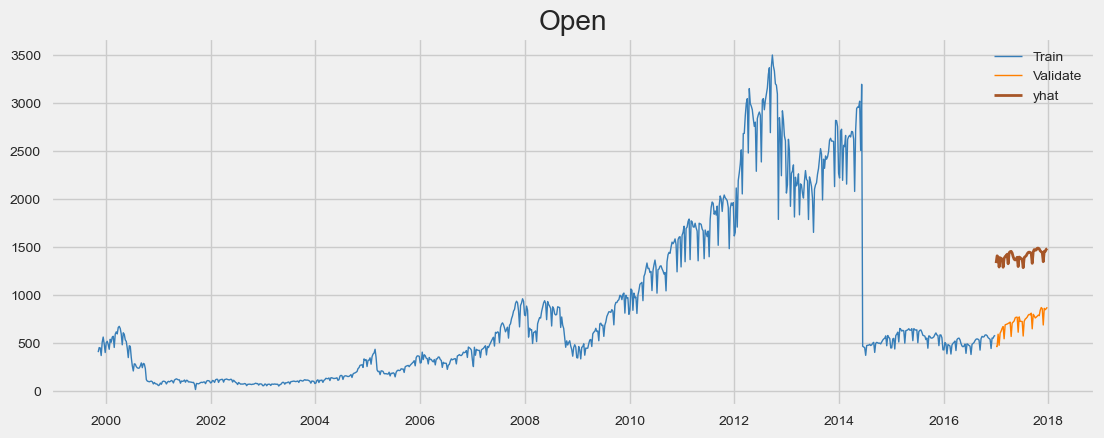

Close -- RMSE: 691


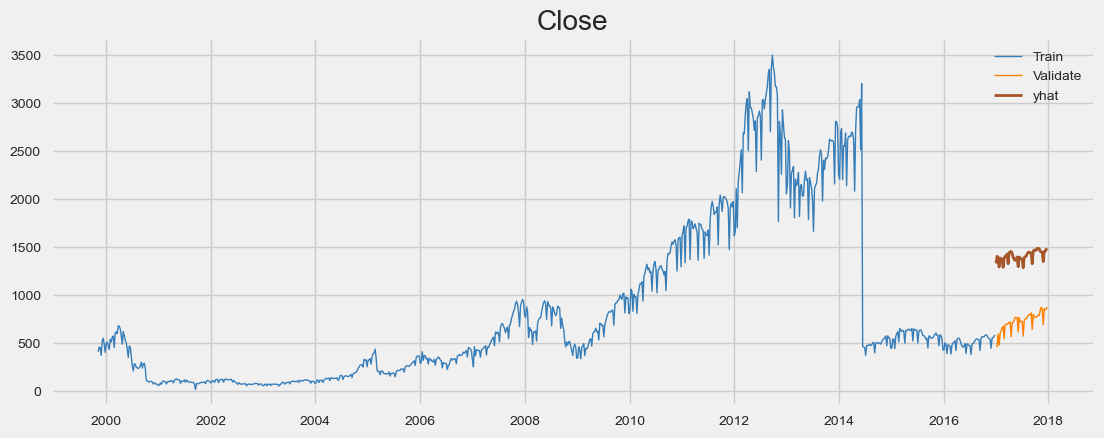

In [340]:
for col in train.columns:
    plot_and_eval(target_var = col)
    eval_df = append_eval_df(model_type = "previous_year", 
                            target_var = col)



eval_df.sort_values(by='rmse')

open_total_min_rmse = eval_df.groupby('target_var')['rmse'].min()[0]

close_min_rmse = eval_df.groupby('target_var')['rmse'].min()[1]

# find which model that is
eval_df[((eval_df.rmse == open_total_min_rmse) | 
         (eval_df.rmse == close_min_rmse))]

train = df_resampled[:train_size]
validate = df_resampled[train_size:validate_end_index]
test = df_resampled[validate_end_index:]


In [341]:

yhat_df = pd.DataFrame({'Open': hst_open_fit1.forecast(validate.shape[0] + test.shape[0]),
                           'Close': hst_close_fit3.forecast(validate.shape[0] + test.shape[0])})
yhat_df

validate.head(1)

test.head(1)

yhat_df = yhat_df['2018-07-01':]

FINAL PERFORMANCE OF MODEL ON TEST DATA
rmse-open total:  1897.3277080083953
rmse-close:  715.3547488117227


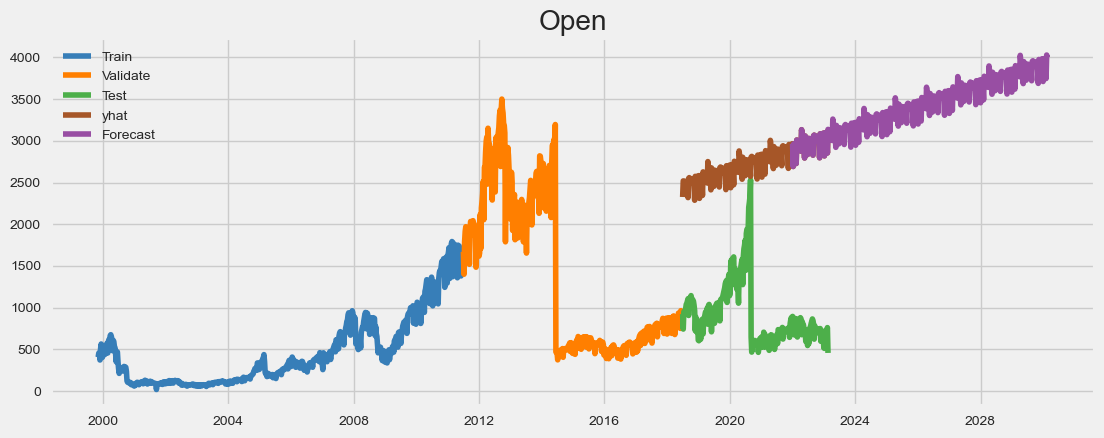

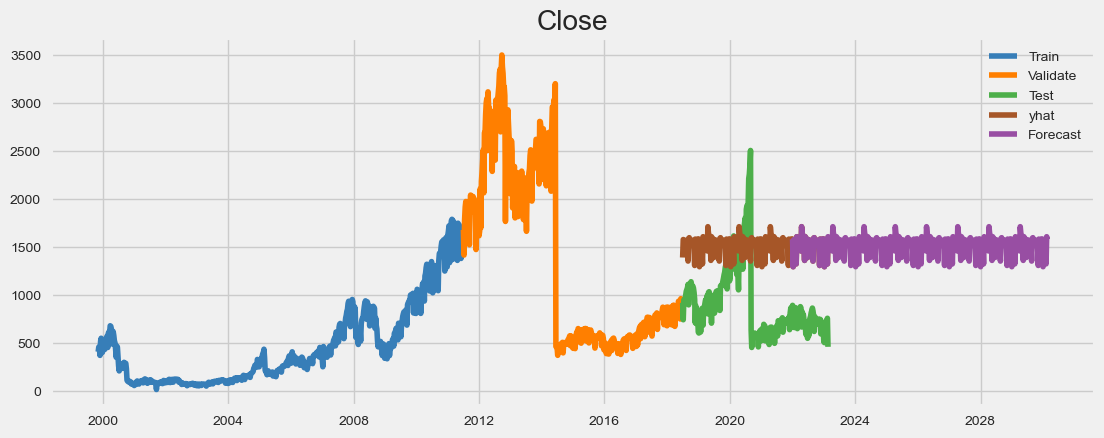

In [342]:

rmse_open_total = sqrt(mean_squared_error(test['Open'], 
                                       yhat_df['Open']))

rmse_close = sqrt(mean_squared_error(test['Close'], 
                                       yhat_df['Close']))

print('FINAL PERFORMANCE OF MODEL ON TEST DATA')
print('rmse-open total: ', rmse_open_total)
print('rmse-close: ', rmse_close)
for col in train.columns:
    final_plot(col)

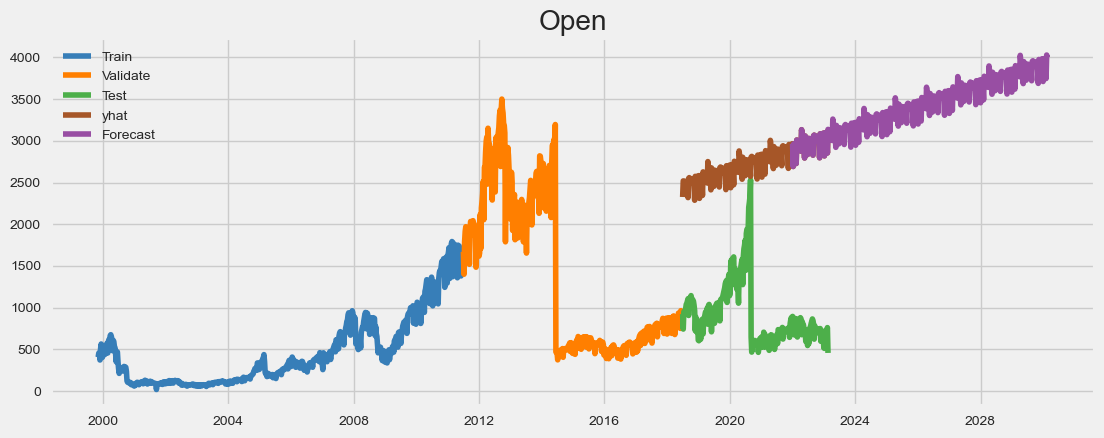

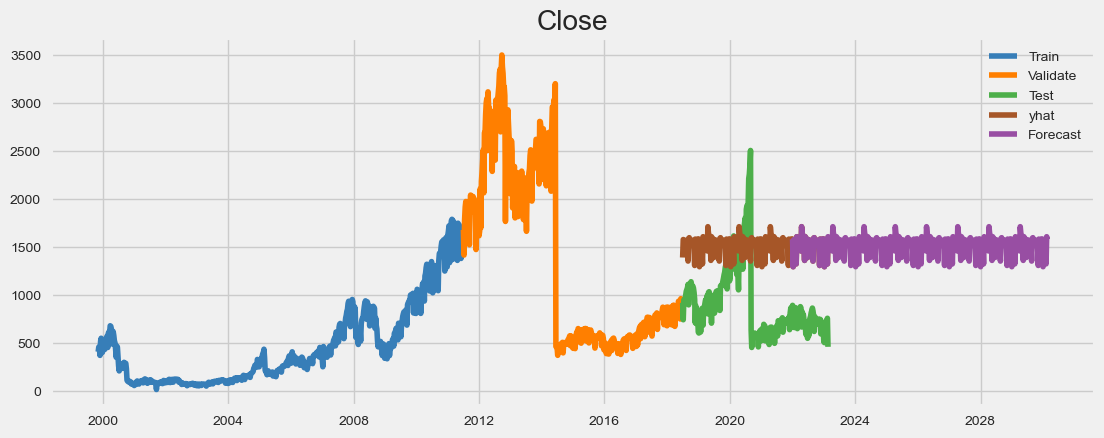

In [343]:

forecast = pd.DataFrame({'Open': hst_open_fit1.forecast(validate.shape[0] + test.shape[0] + 365),
                           'Close': hst_close_fit3.forecast(validate.shape[0] + test.shape[0] + 365)})
forecast = forecast['2022':]
forecast

def final_plot(target_var):
    plt.figure(figsize=(12,4))
    plt.plot(train[target_var], color='#377eb8', label='Train')
    plt.plot(validate[target_var], color='#ff7f00', label='Validate')
    plt.plot(test[target_var], color='#4daf4a', label='Test')
    plt.plot(yhat_df[target_var], color='#a65628', label='yhat')
    plt.plot(forecast[target_var], color='#984ea3', label='Forecast')
    plt.title(target_var)
    plt.legend()
    plt.show()

for col in train.columns:
    final_plot(col)

# Conclusion and Recommendations

**IN CONCLUSION:**
- Our model prredicted that the closing price for Apple stock will plateau and slowly increase into the next 20 years. 
- I find that the stock for Apple is volitile and our prediction is strong but not confident in our future hypothesis. 
- The next steps will be to forecast on a stationary model to help predict further trends. 
- I recommend deeper Machine Learning models for volitile markets, i.e. Tensor Flow. 